# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Numeric and categorical

In [6]:
numerical_var = ["age","bmi", "children", "charges"]
df[numerical_var]

age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]

In [7]:
categorical_var = ["sex", "smoker", "region"]
df[categorical_var]

sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]

## Nulls

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariate analysis

### Numerical variables

#### Histplots

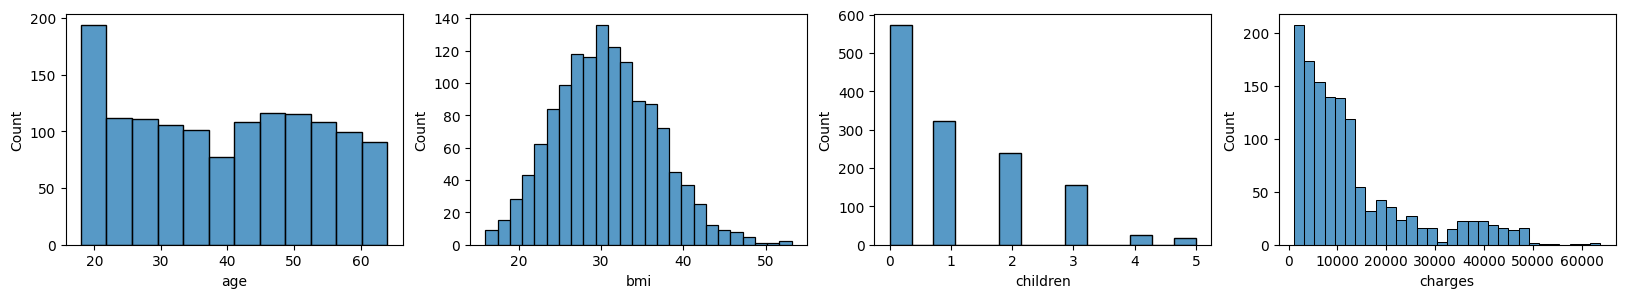

In [9]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax = ax.flatten()

for i in range(0,len(df[numerical_var].columns)):
    sns.histplot(df[numerical_var].iloc[:,i], ax=ax[i])

plt.show()

In [10]:
def analizar_distribucion(dataframe):
    for column in dataframe.columns:
        # Calculando estadísticas
        datos = dataframe[column]
        media = datos.mean()
        mediana = datos.median()
        simetria = skew(datos)
        curt = kurtosis(datos)

        # Graficar histograma y la curva normal teórica
        plt.figure(figsize=(10, 6))
        plt.hist(datos, bins=30, alpha=0.7, color='b', density=True, label='Histograma')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, media, np.std(datos))
        plt.plot(x, p, 'k', linewidth=2, label='Curva normal teórica')
        
        title = f"Histograma de '{column}' (Media={media:.2f}, Mediana={mediana:.2f}, Skew={simetria:.2f}, Kurtosis={curt:.2f})"
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Resultados en texto
        print(f"Análisis de la columna '{column}':")
        print(f"  Media: {media:.2f}")
        print(f"  Mediana: {mediana:.2f}")
        print(f"  Simetría: {simetria:.2f}")
        print(f"  Curtosis: {curt:.2f}\n")

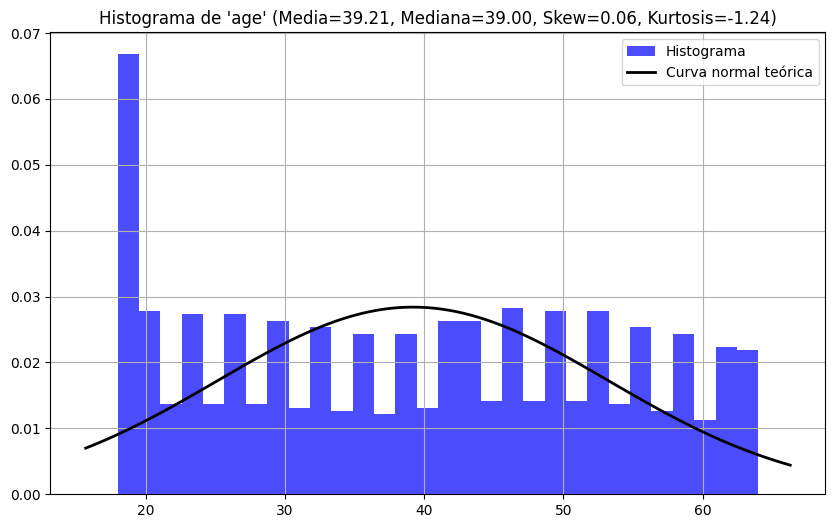

Análisis de la columna 'age':
  Media: 39.21
  Mediana: 39.00
  Simetría: 0.06
  Curtosis: -1.24



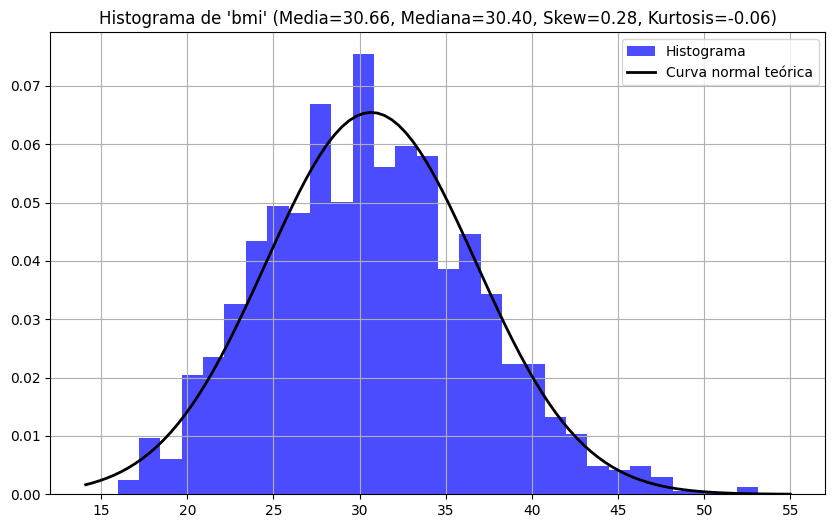

Análisis de la columna 'bmi':
  Media: 30.66
  Mediana: 30.40
  Simetría: 0.28
  Curtosis: -0.06



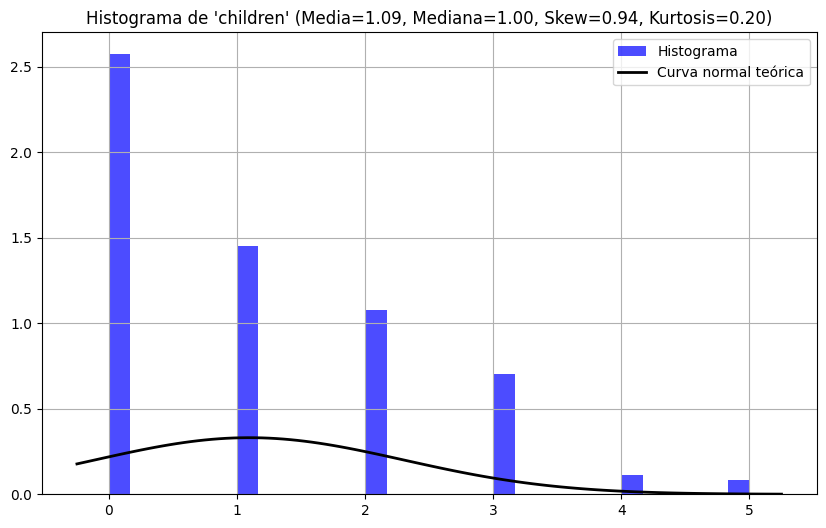

Análisis de la columna 'children':
  Media: 1.09
  Mediana: 1.00
  Simetría: 0.94
  Curtosis: 0.20



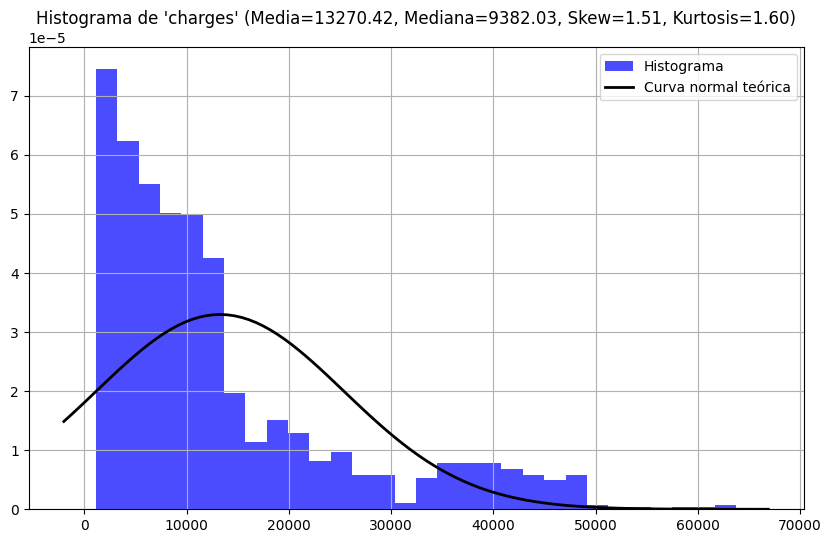

Análisis de la columna 'charges':
  Media: 13270.42
  Mediana: 9382.03
  Simetría: 1.51
  Curtosis: 1.60



In [11]:
analizar_distribucion(df[numerical_var])

#### Boxplots

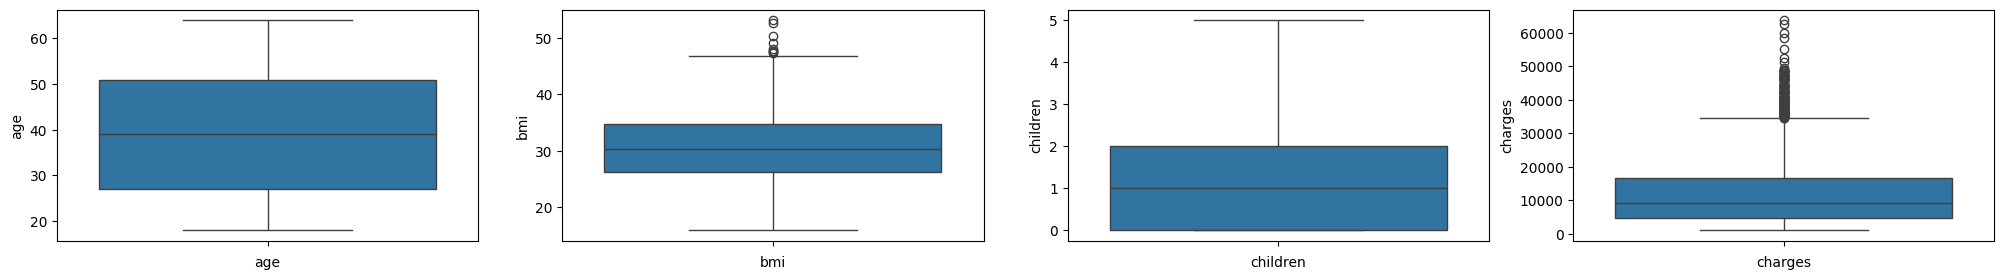

In [12]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(df[numerical_var].columns)):
    sns.boxplot(df[numerical_var].iloc[:,i], ax=ax[i])
    ax[i].set_xlabel(df[numerical_var].columns[i])
    #ax[i].set_title(df[numerical_var].columns[i])

plt.show()

In [13]:
df[df[numerical_var]["bmi"]>45]

age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
292    25    male  45.54         2    yes  southeast  42112.23560
401    47    male  47.52         1     no  southeast   8083.91980
438    52  female  46.75         5     no  southeast  12592.53450
454    32    male  46.53         2     no  southeast   4686.38870
543    54  female  47.41         0    yes  southeast  63770.42801
547    54  female  46.70         2     no  southwest  11538.42100
549    43  female  46.20         0    yes  southeast  45863.20500
582    39    male  45.43         2     no  southeast   6356.27070
660    37    male  46.53         3     no  southeast   6435.62370
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
930    26    male  46.53         1     no  southeast   2927.06470
941    50  female  46.09         1     no  southeast   9549.56510
1024   47  female  45.32         1     no  southeast   8569.86180
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1131   27    male  45.90         2     no  southwest   3693.42800
1317   18    male  53.13         0     no  southeast   1163.46270

In [14]:
df[df["charges"]>35000]

age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[133 rows x 7 columns]

In [15]:
df[df["charges"]>35000].groupby("smoker").size()

smoker
no       3
yes    130
dtype: int64

#### Violinplots

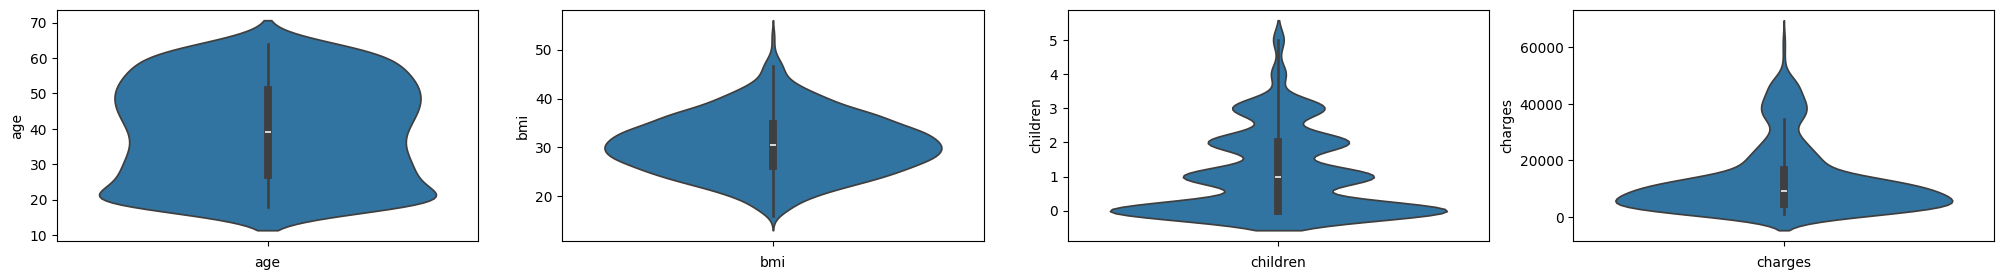

In [16]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(df[numerical_var].columns)):
    sns.violinplot(df[numerical_var].iloc[:,i], ax=ax[i])
    ax[i].set_xlabel(df[numerical_var].columns[i])
    #ax[i].set_title(df[numerical_var].columns[i])

plt.show()

### Categorical variables

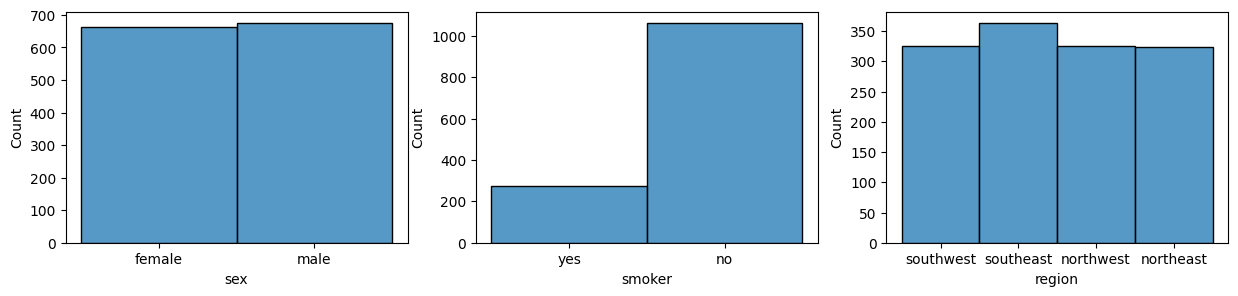

In [17]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax = ax.flatten()

for i in range(0,len(df[categorical_var].columns)):
    sns.histplot(df[categorical_var].iloc[:,i], ax=ax[i])

plt.show()

In [18]:
df[["charges", "sex"]].groupby("sex").mean()

charges
sex                 
female  12569.578844
male    13956.751178

In [19]:
df[["charges", "smoker"]].groupby("smoker").mean()

charges
smoker              
no       8434.268298
yes     32050.231832

In [20]:
df[["charges", "region"]].groupby("region").mean()

charges
region                 
northeast  13406.384516
northwest  12417.575374
southeast  14735.411438
southwest  12346.937377

## Bivariate analysis

### Pairplots

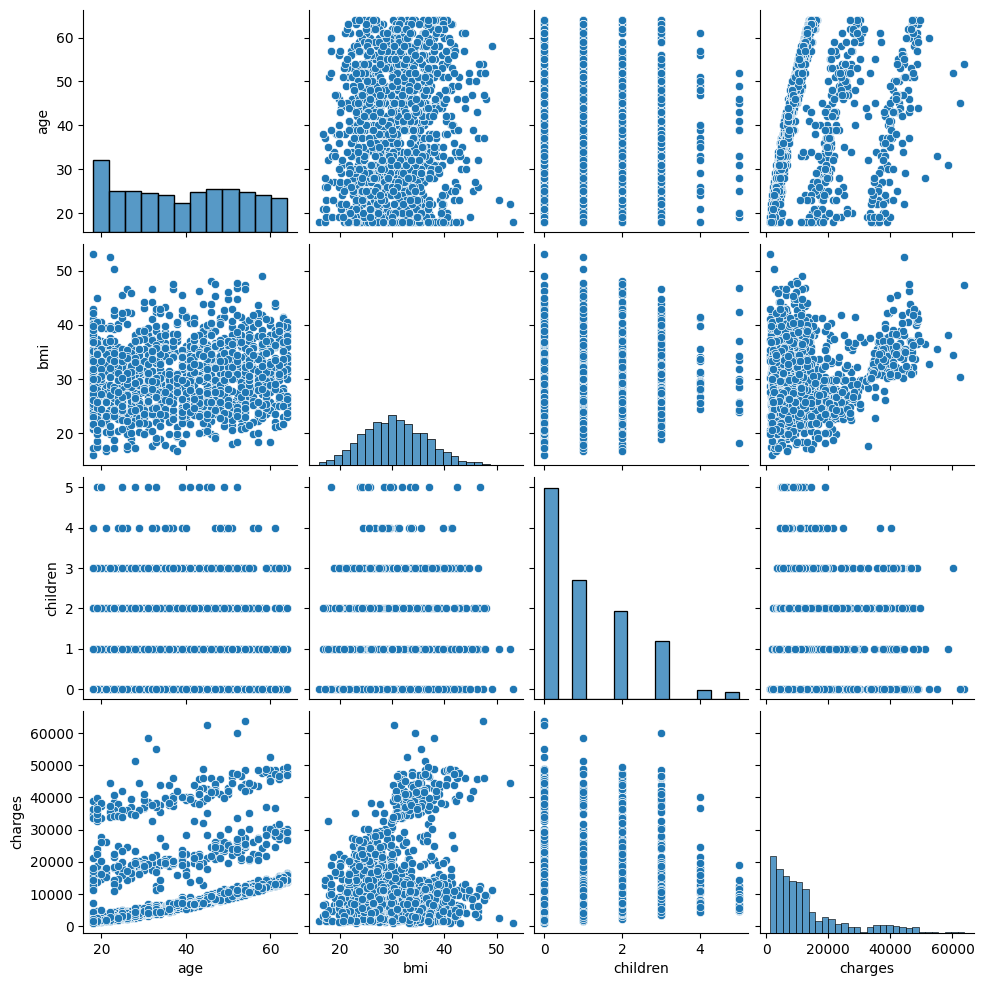

In [21]:
sns.pairplot(df)

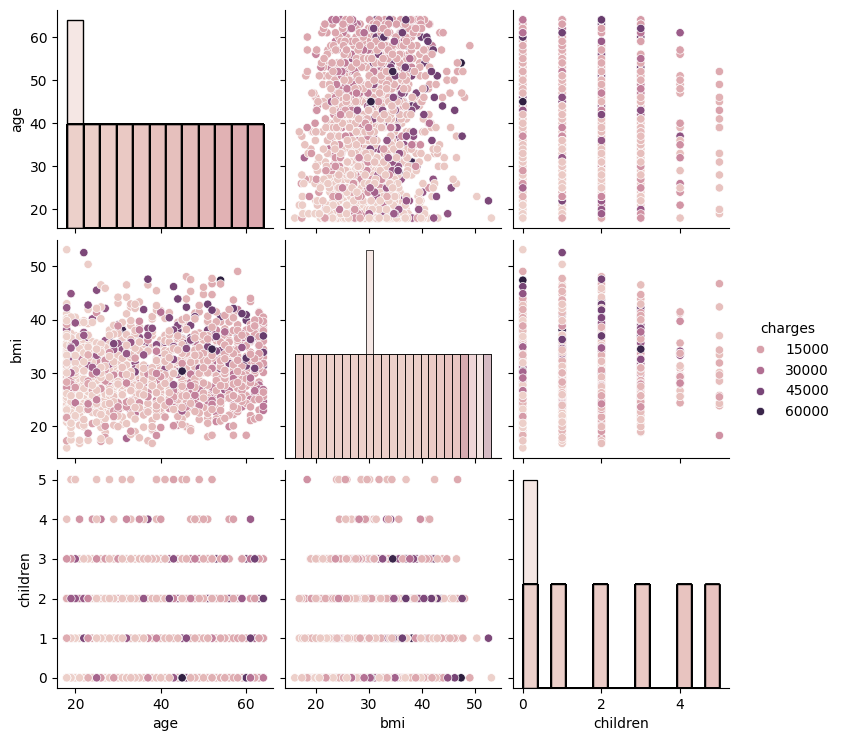

In [22]:
sns.pairplot(df, hue="charges", diag_kind="hist")

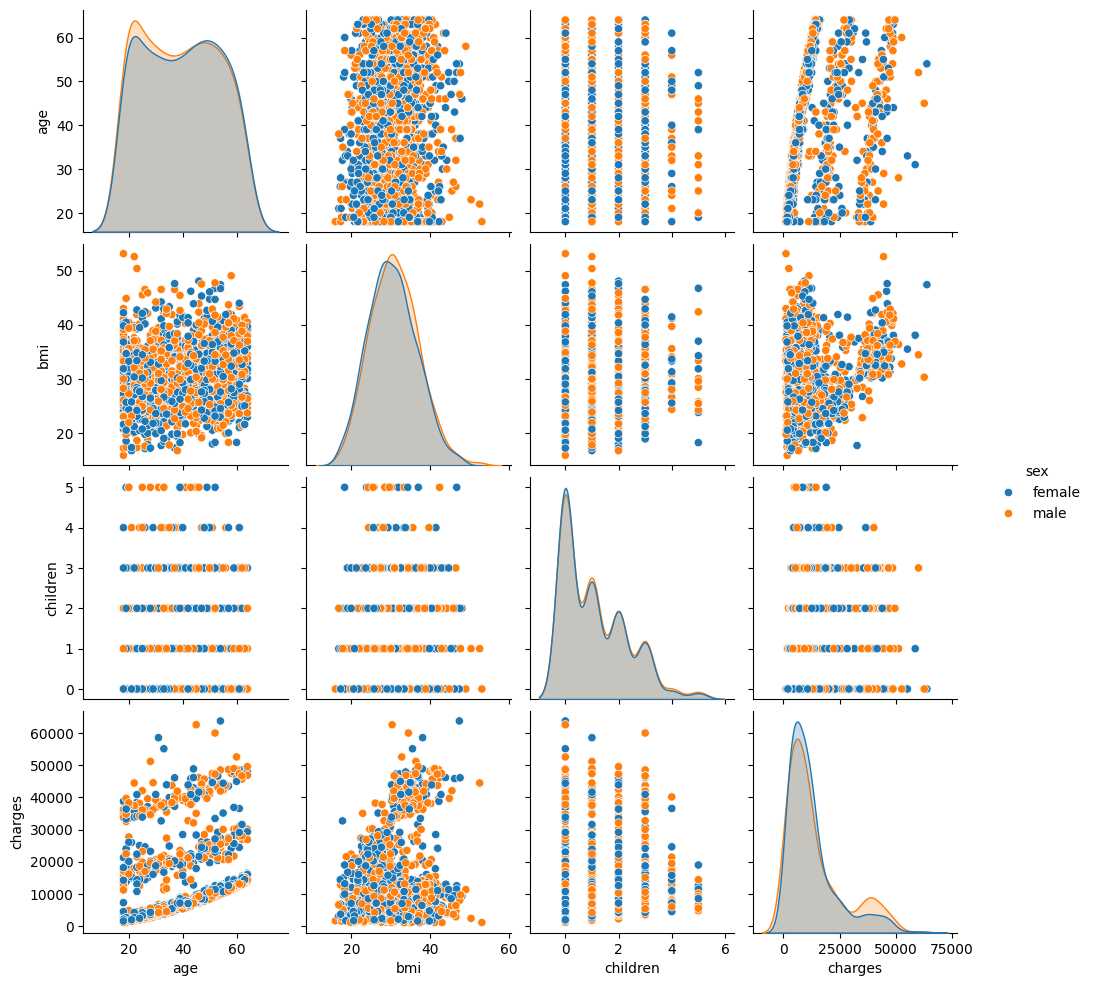

In [23]:
sns.pairplot(df,hue="sex")

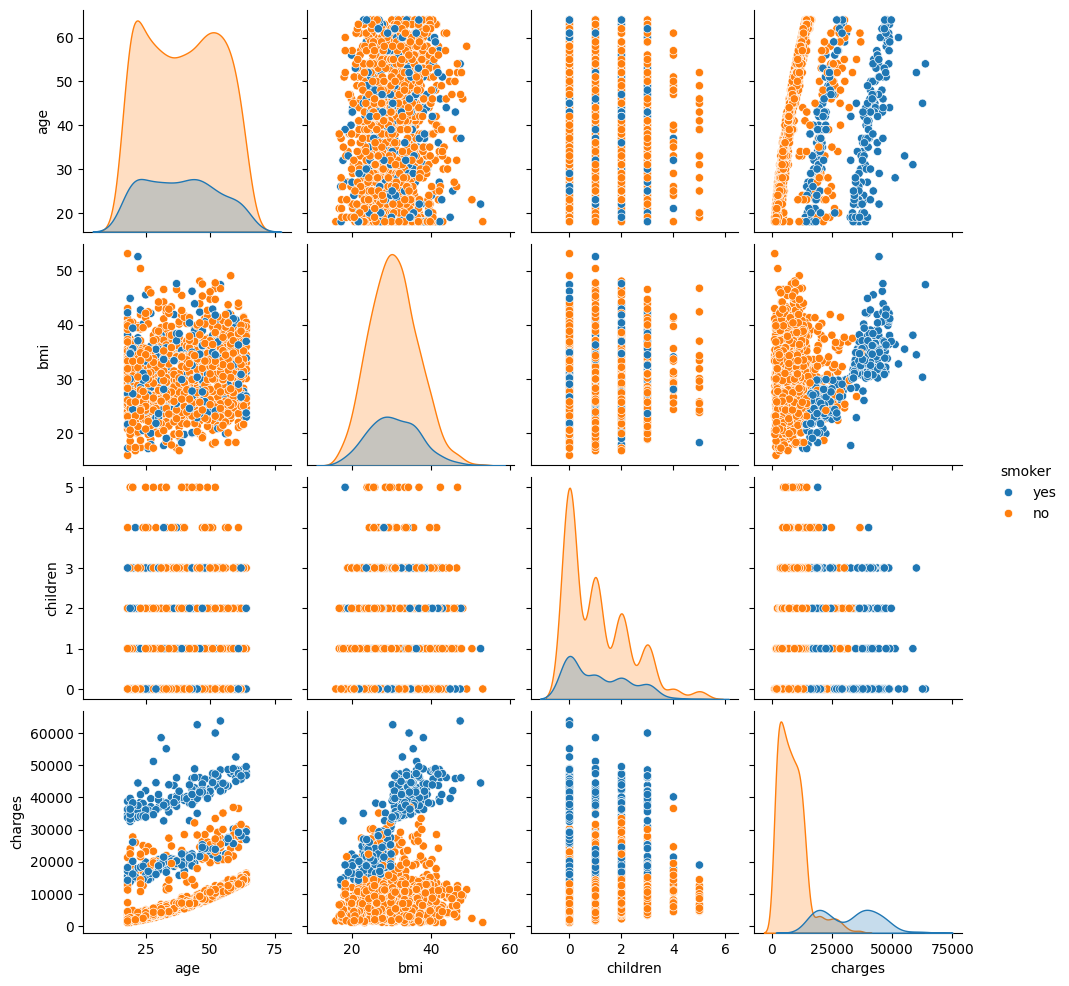

In [24]:
sns.pairplot(df,hue="smoker")

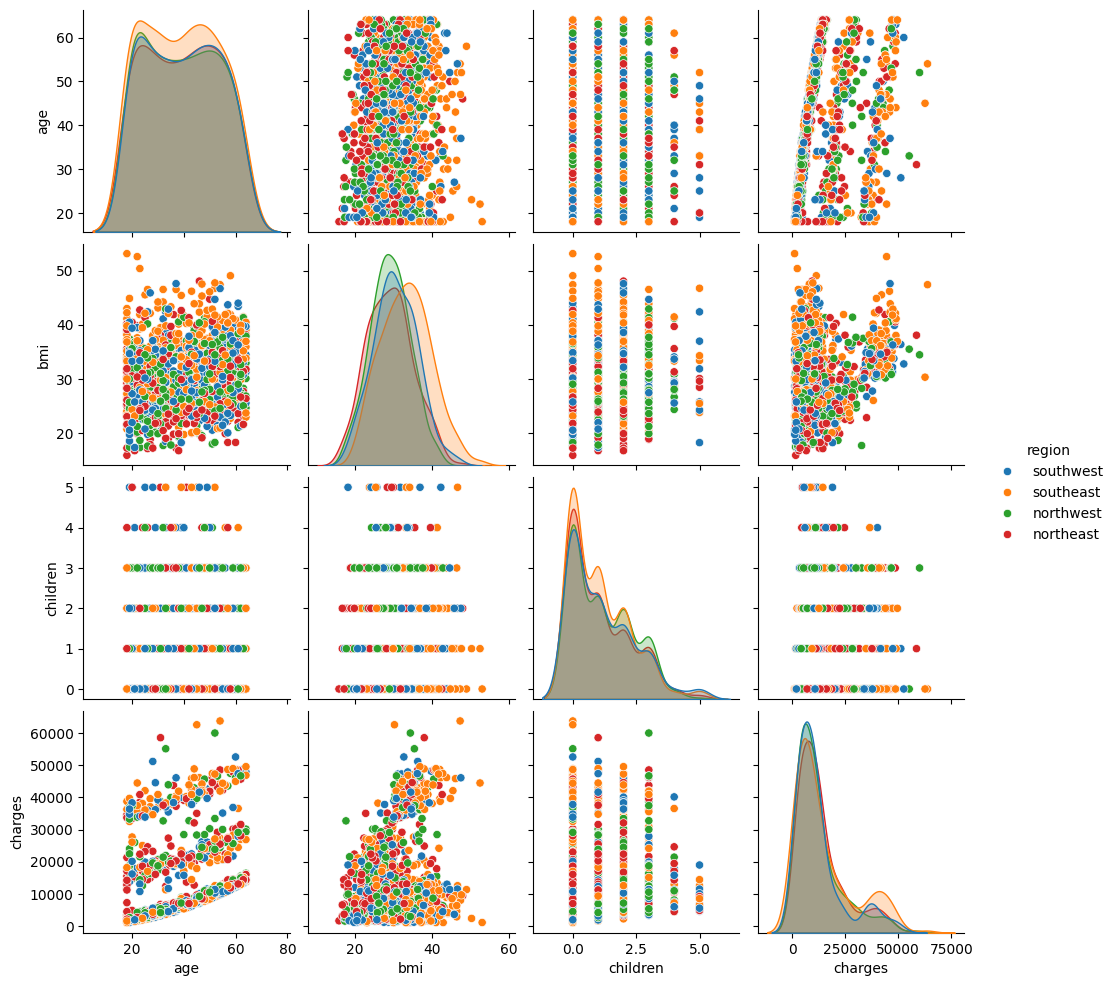

In [25]:
sns.pairplot(df,hue="region")

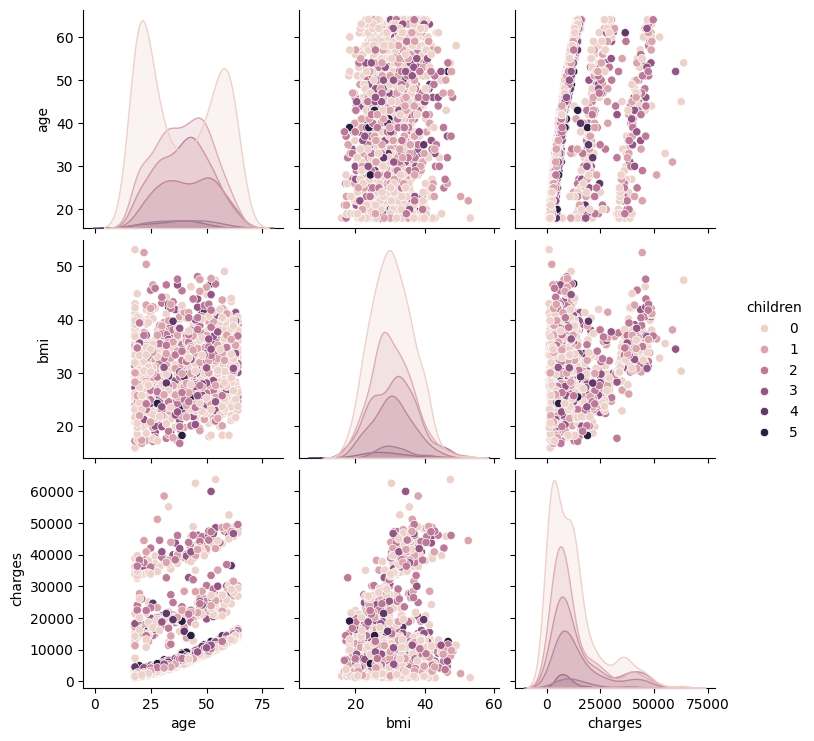

In [26]:
sns.pairplot(df,hue="children")

### Distributions

#### Smoker

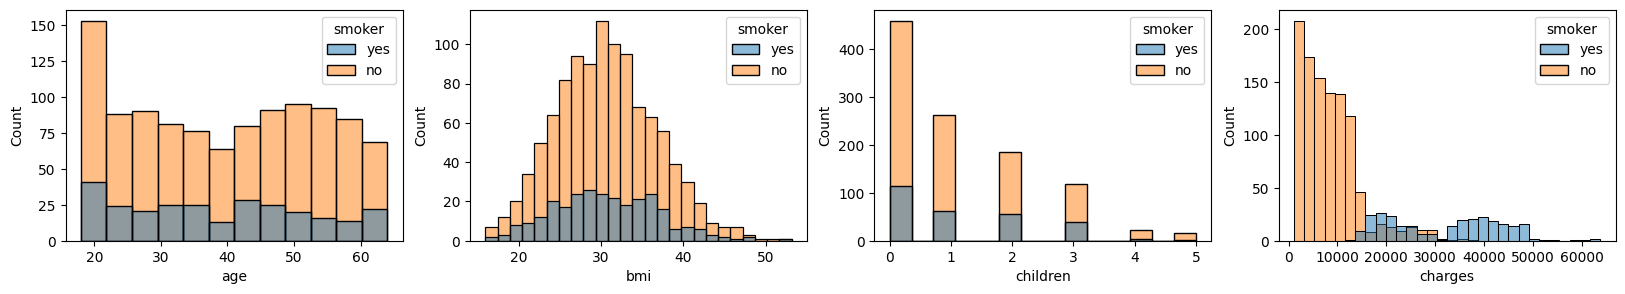

In [27]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.histplot(x=numerical_var[i], ax=ax[i], hue="smoker", data=df)

plt.show()

#### Region

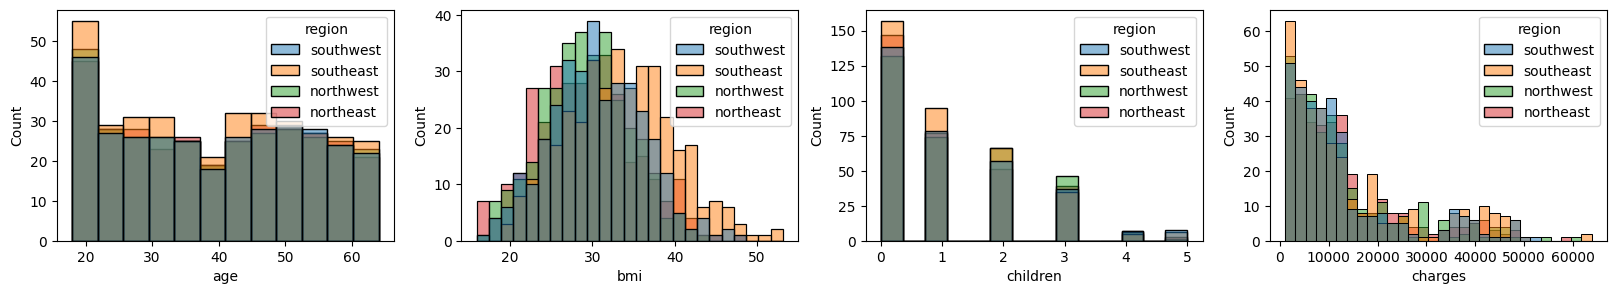

In [28]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.histplot(x=numerical_var[i], ax=ax[i], hue="region", data=df)

plt.show()

#### Sex

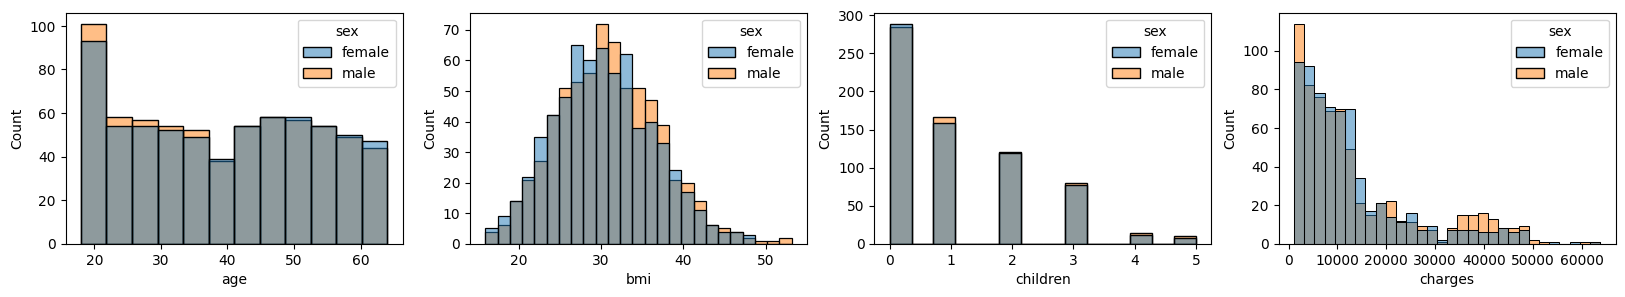

In [29]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.histplot(x=numerical_var[i], ax=ax[i], hue="sex", data=df)

plt.show()

#### Children

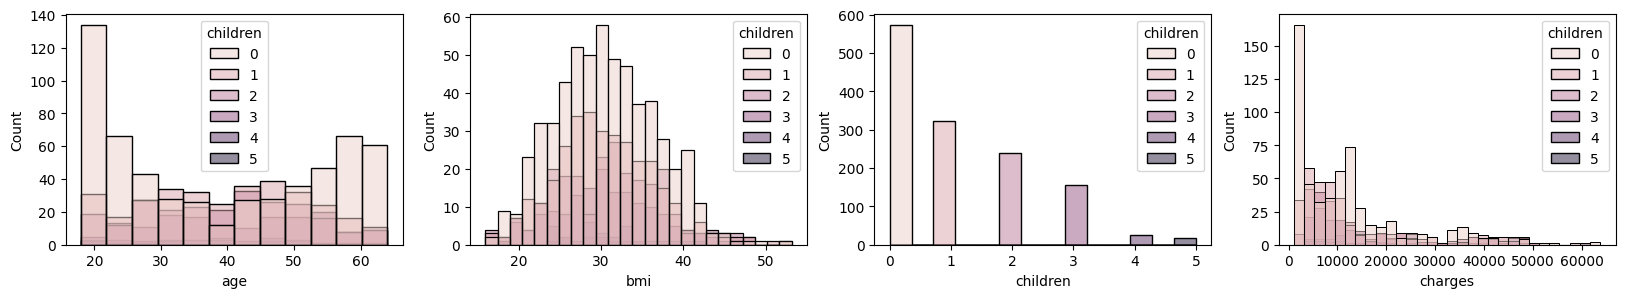

In [30]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.histplot(x=numerical_var[i], ax=ax[i], hue="children", data=df)

plt.show()

### Scatter Plots

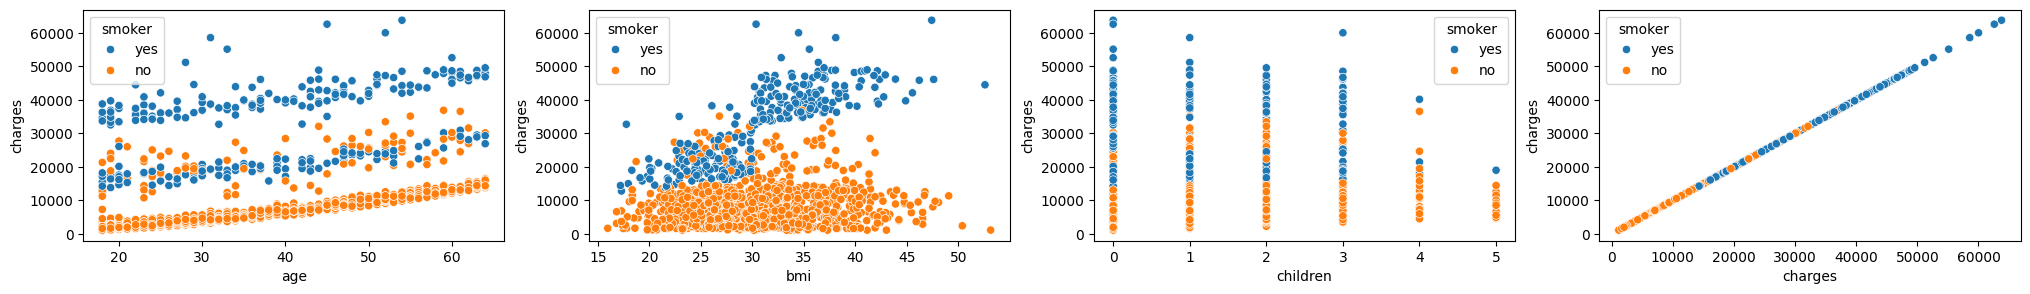

In [31]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.scatterplot(x=numerical_var[i], y="charges", ax=ax[i], hue="smoker", data=df)

plt.show()

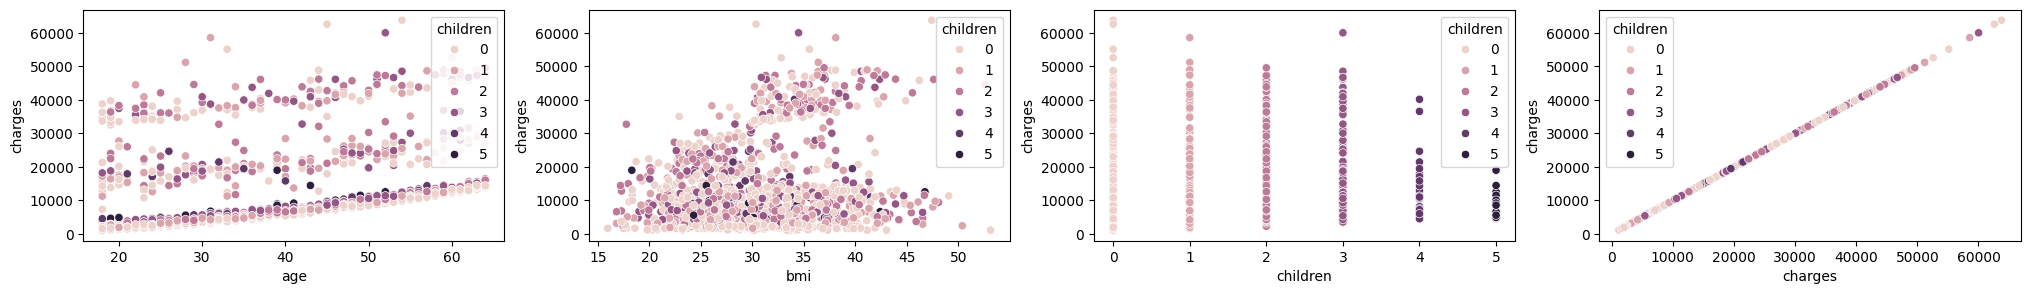

In [32]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.scatterplot(x=numerical_var[i], y="charges", ax=ax[i], hue="children", data=df)

plt.show()

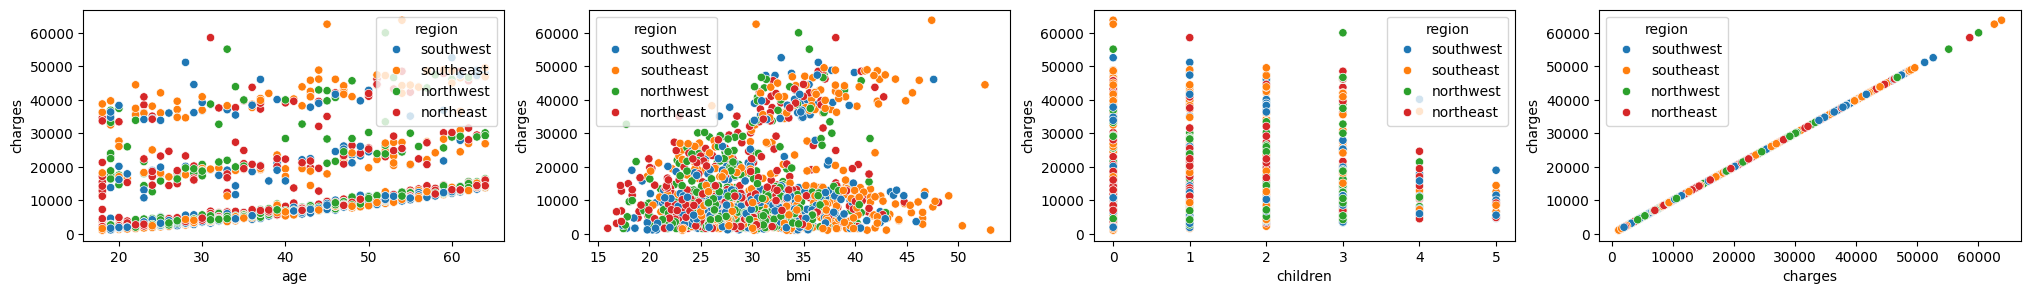

In [33]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.scatterplot(x=numerical_var[i], y="charges", ax=ax[i], hue="region", data=df)

plt.show()

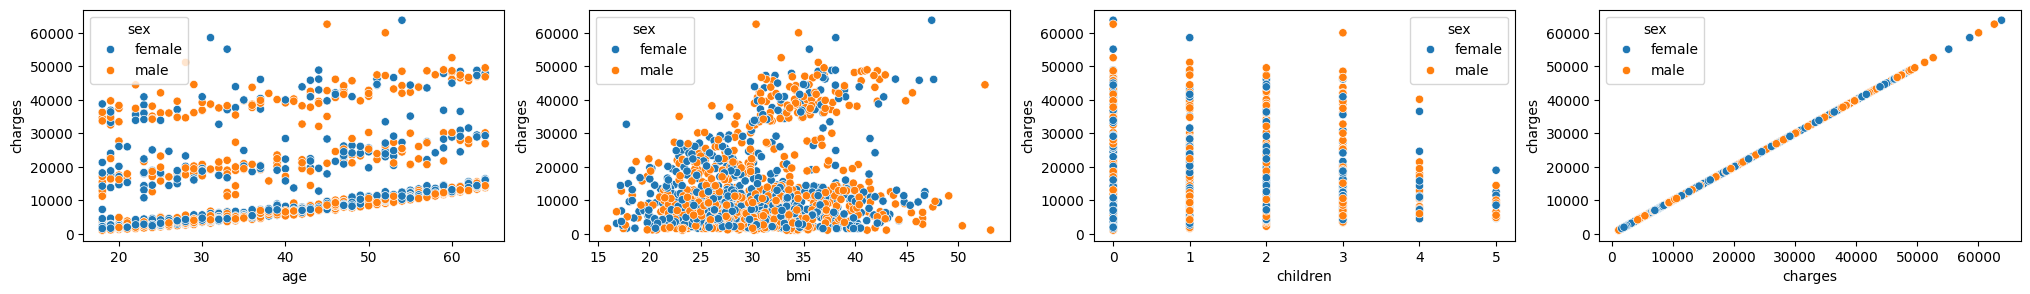

In [34]:
fig, ax = plt.subplots(1,4,figsize=(25,3))
ax = ax.flatten()

for i in range(0,len(numerical_var)):
    sns.scatterplot(x=numerical_var[i], y="charges", ax=ax[i], hue="sex", data=df)

plt.show()

### Box Plots

C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\3592942721.py:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=var, y="charges", hue="smoker", palette=palette, ax=ax)


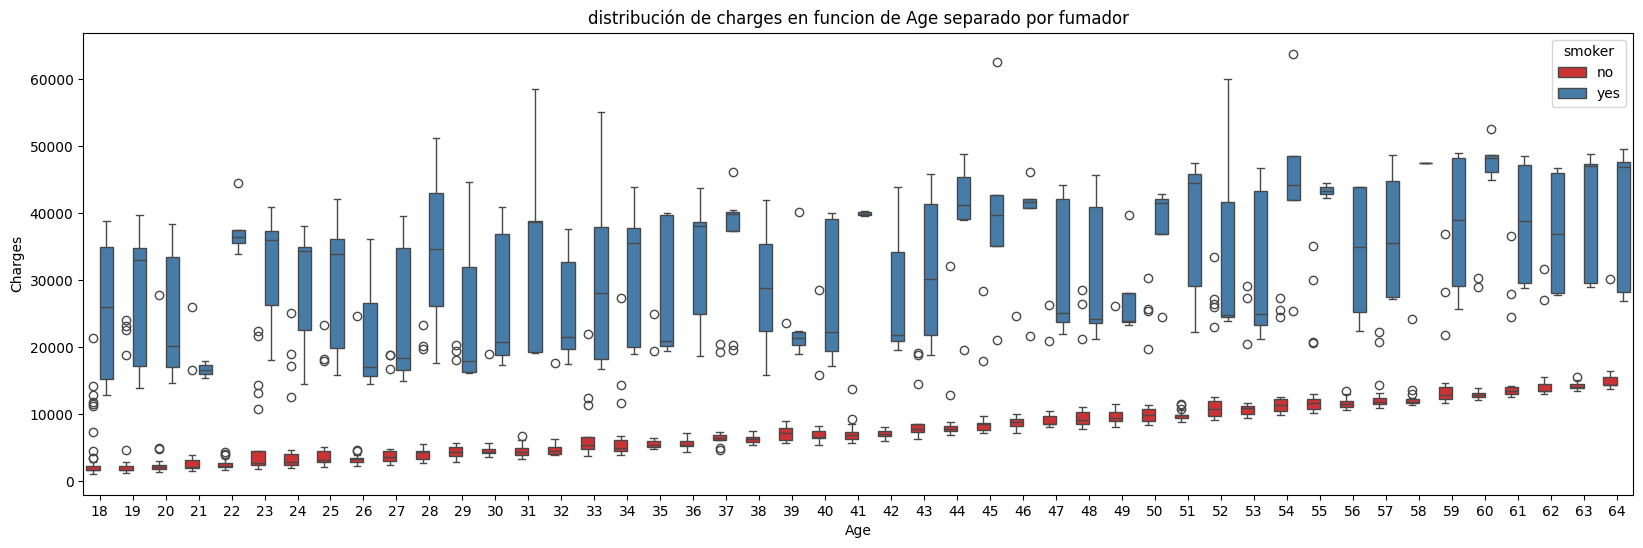

In [35]:
var = "age"
var_title="Age"
fig, ax = plt.subplots(figsize=(20, 6))
palette=sns.color_palette("Set1")
sns.boxplot(data=df, x=var, y="charges", hue="smoker", palette=palette, ax=ax)
ax.set_xlabel(var_title)
ax.set_ylabel("Charges")
ax.set_title(f"distribución de charges en funcion de {var_title} separado por fumador")
ax.grid(False)
plt.show()

   age age_group
0   19   Jovenes
1   18   Jovenes
2   28   Jovenes
3   33   Jovenes
4   32   Jovenes


C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\1407356372.py:7: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(data=df2, x='age_group', y='charges', hue='smoker', palette=palette, ax=ax)


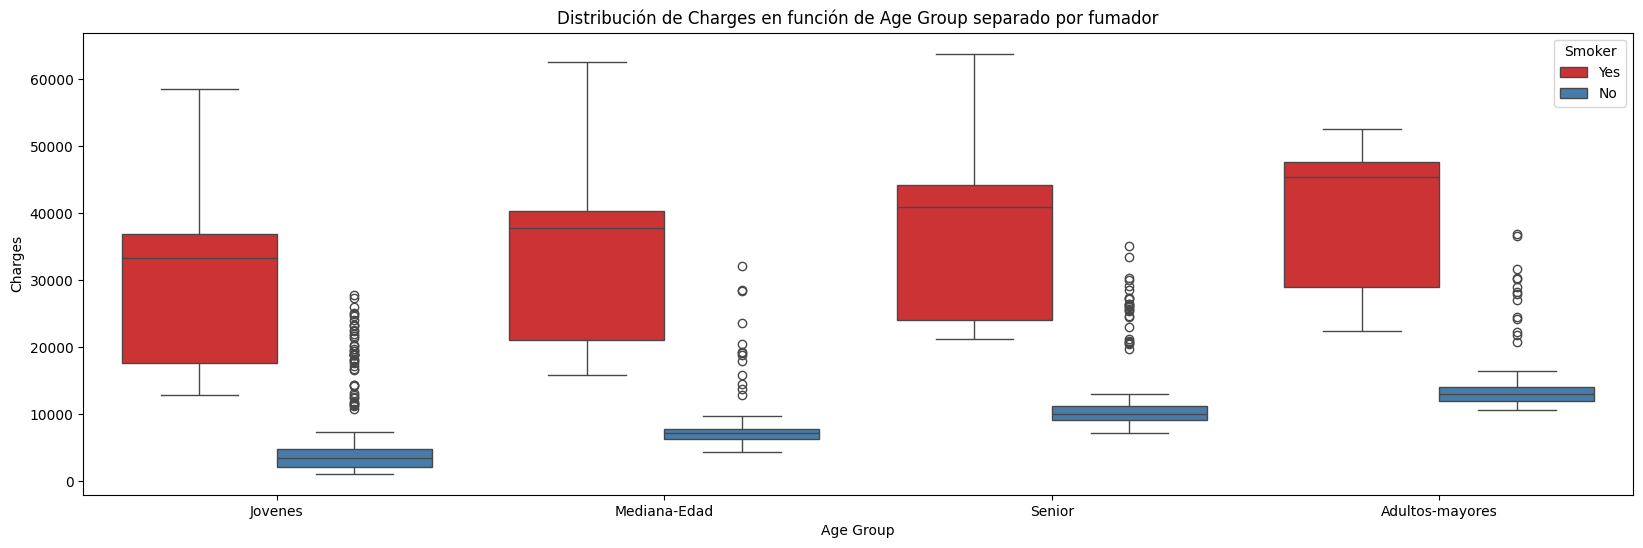

In [36]:
df2=df.copy()
bins = [0,35, 45, 55, 65]  # Ajusta estos valores según sea necesario
df2['age_group'] = pd.cut(df['age'], bins=bins, labels=["Jovenes", "Mediana-Edad", "Senior", "Adultos-mayores"])
print(df2[['age', 'age_group']].head())
fig, ax = plt.subplots(figsize=(20, 6))
palette = sns.color_palette("Set1")
sns.boxplot(data=df2, x='age_group', y='charges', hue='smoker', palette=palette, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Charges')
ax.set_title('Distribución de Charges en función de Age Group separado por fumador')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Yes', 'No'], title='Smoker')
ax.grid(False)  # Puedes activar la cuadrícula si es necesario
# Mostrar el gráfico
plt.show()

### Density plots

C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\2112903708.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x=var, hue='smoker', multiple='stack', kde=False, alpha=0.7, palette=palette, ax=ax[0])
C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\2112903708.py:16: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[1])
C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\2112903708.py:22: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[2])


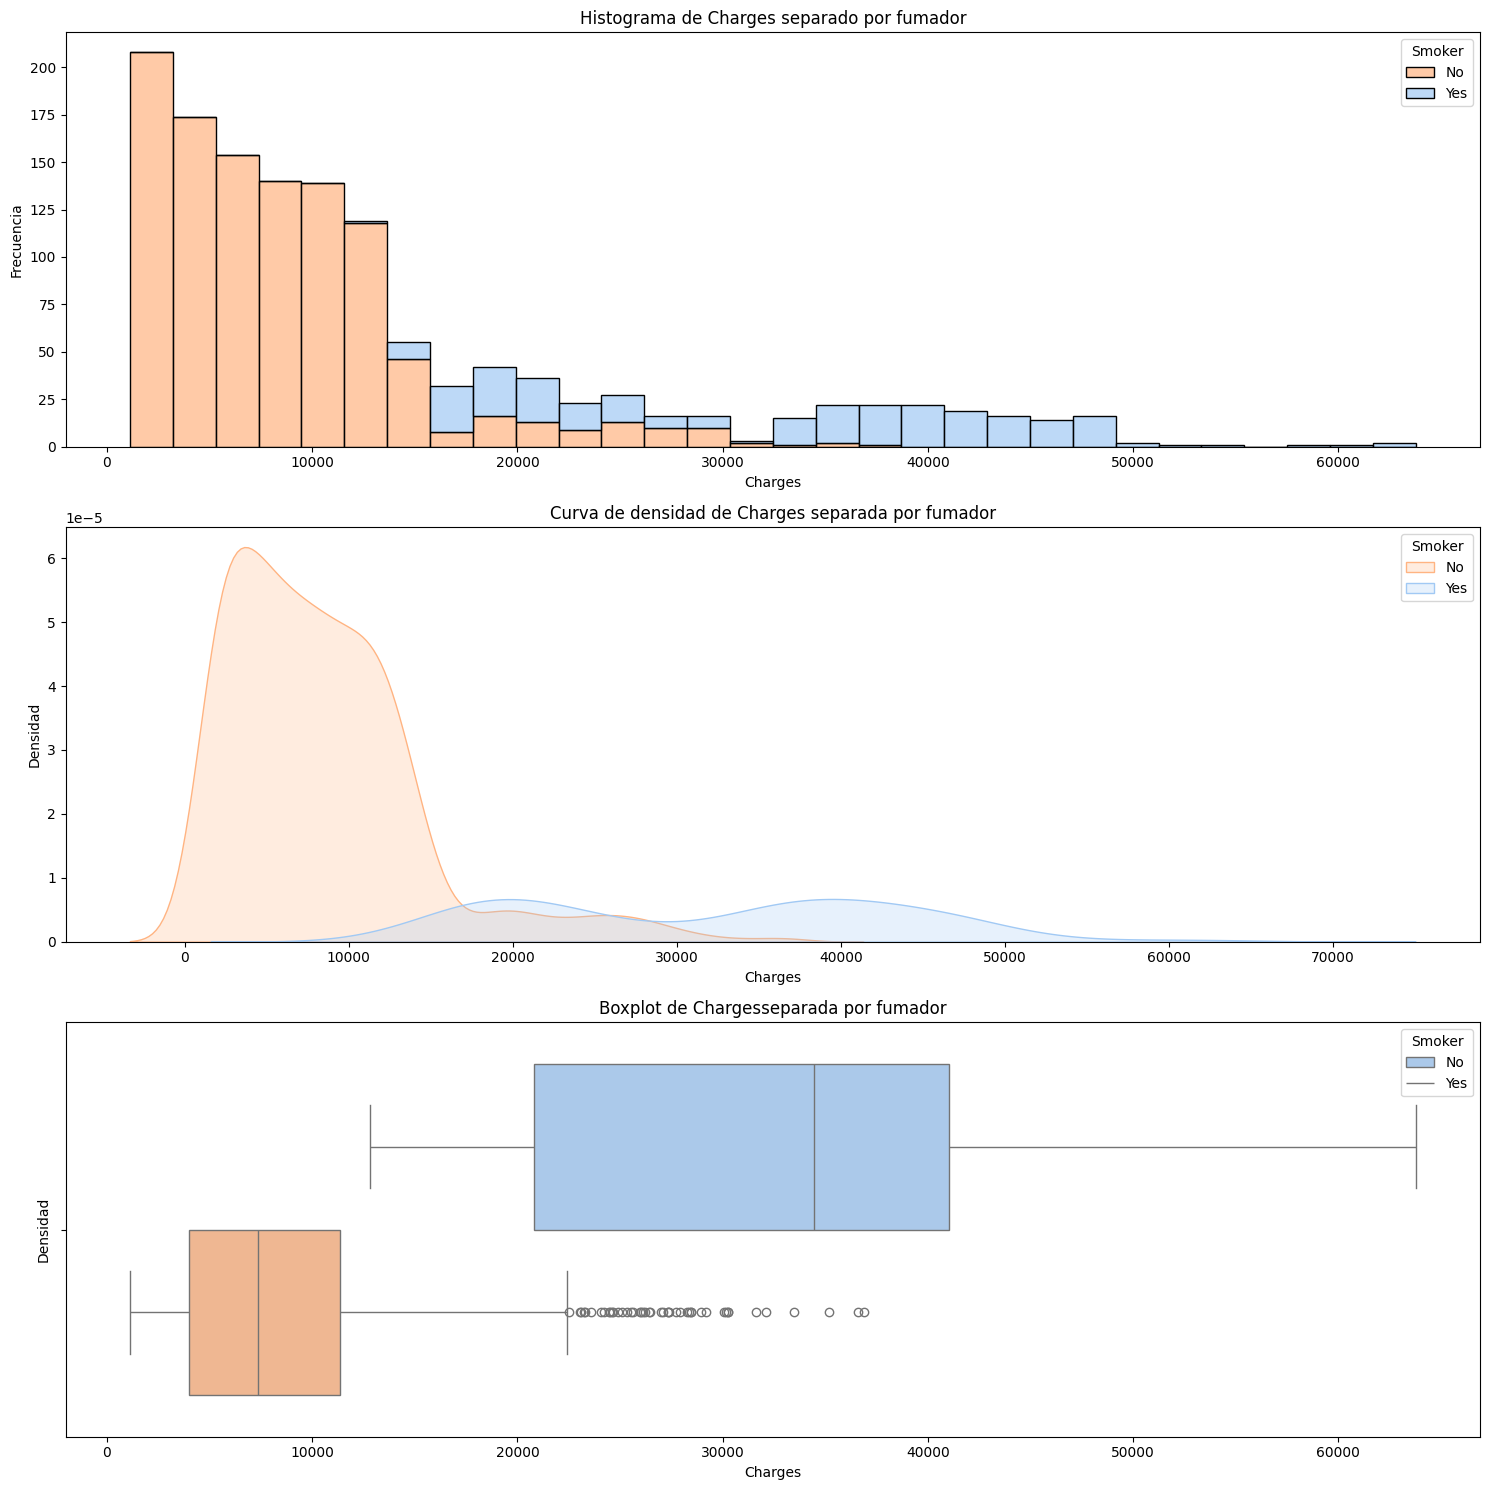

In [37]:
# Definir la variable y el título
var = 'charges'
var_title = 'Charges'

# Crear subgráficos
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
palette = sns.color_palette("pastel")
# Histograma separado por 'smoker'
sns.histplot(data=df, x=var, hue='smoker', multiple='stack', kde=False, alpha=0.7, palette=palette, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].set_title(f'Histograma de {var_title} separado por fumador')
ax[0].legend(title='Smoker', labels=['No', 'Yes'])
ax[0].grid(False)  # Quitar cuadrícula
# Curva de densidad separada por 'smoker'
sns.kdeplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].set_title(f'Curva de densidad de {var_title} separada por fumador')
ax[1].legend(title='Smoker', labels=['No', 'Yes'])
ax[1].grid(False)  # Quitar cuadrícula
sns.boxplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[2])


ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')
ax[2].set_title(f'Boxplot de {var_title}separada por fumador')
ax[2].legend(title='Smoker', labels=['No', 'Yes'])
ax[2].grid(False)  # Quitar cuadrícula
# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

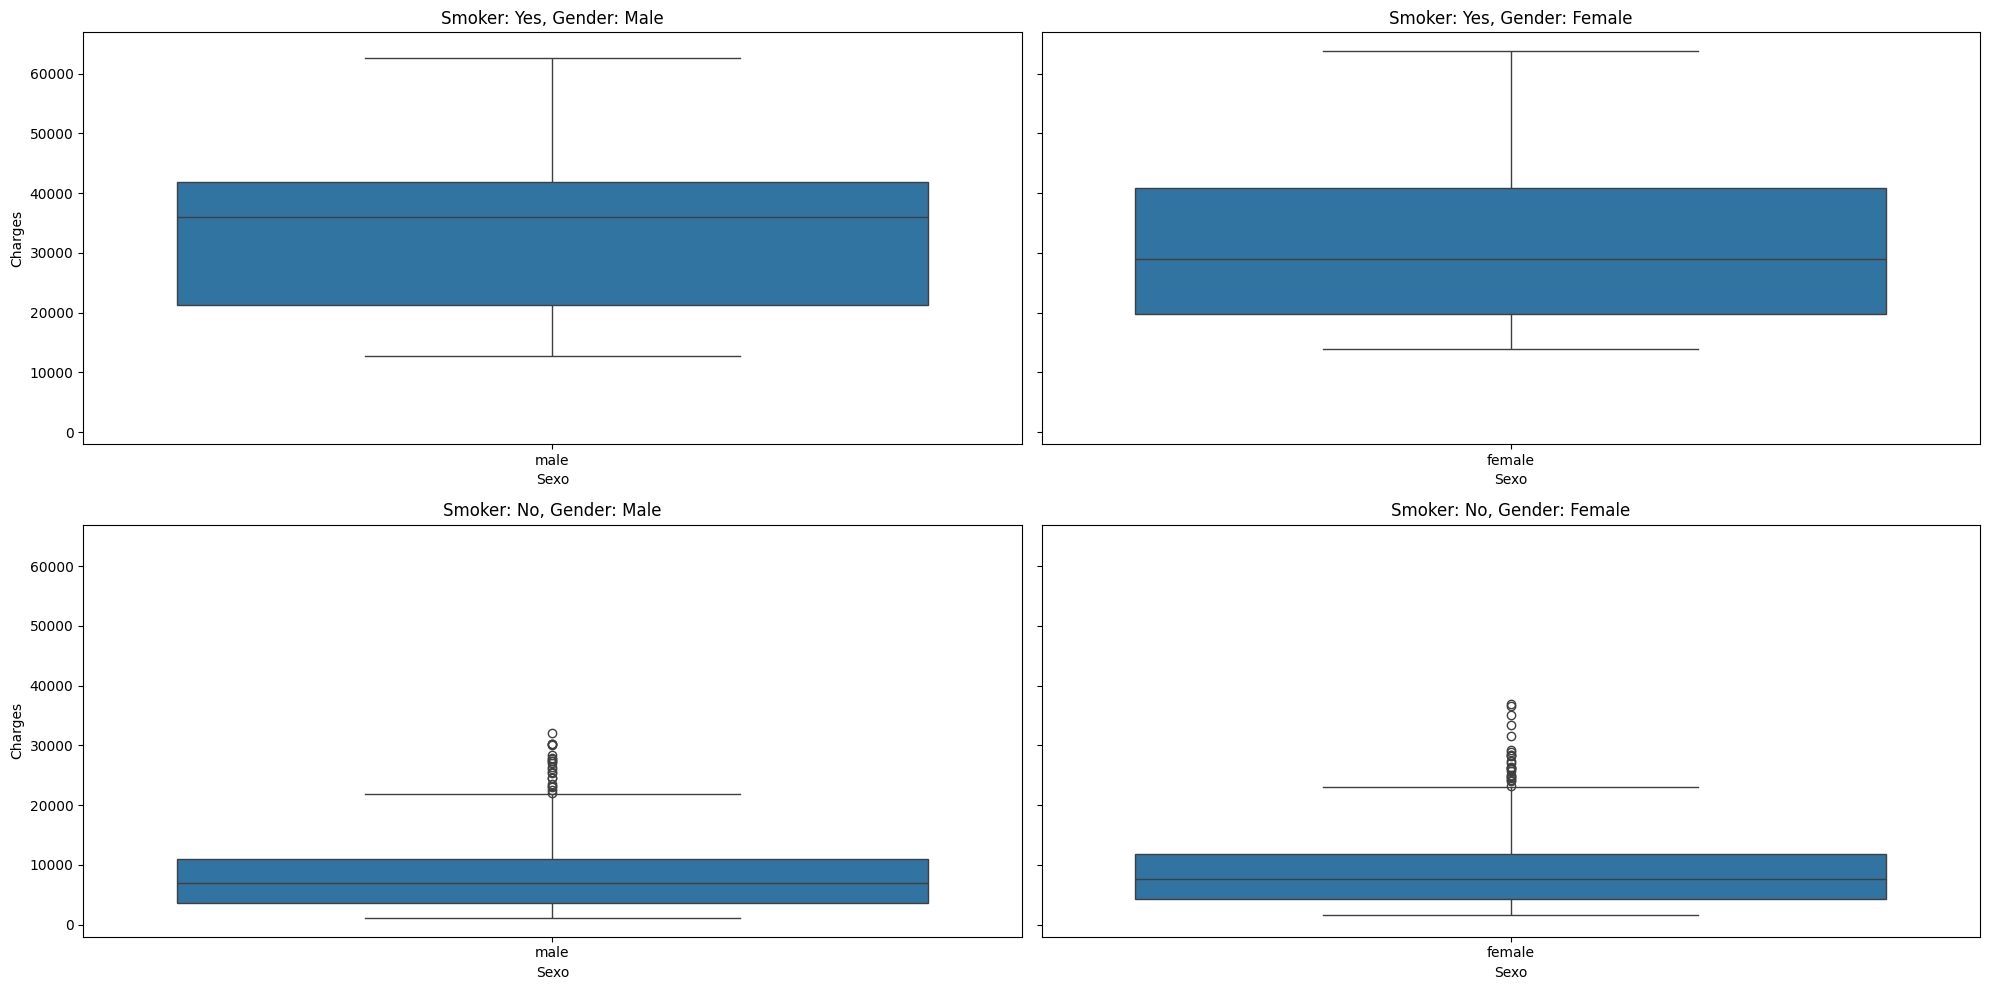

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Definir la variable y el título
var = 'sex'
var_title = 'Sexo'
# Crear subgráficos
fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharey=True)  # Dos filas y dos columnas
# Paleta de colores
palette = sns.color_palette("Set1")
# Filtrar los datos por estado de fumador y género para cada gráfico
df_smoker_yes_male = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]
df_smoker_yes_female = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]
df_smoker_no_male = df[(df['smoker'] == 'no') & (df['sex'] == 'male')]
df_smoker_no_female = df[(df['smoker'] == 'no') & (df['sex'] == 'female')]
# Crear los gráficos de caja
sns.boxplot(data=df_smoker_yes_male, x=var, y='charges', ax=ax[0, 0])
ax[0, 0].set_xlabel(var_title)
ax[0, 0].set_ylabel('Charges')
ax[0, 0].set_title('Smoker: Yes, Gender: Male')
ax[0, 0].grid(False)
sns.boxplot(data=df_smoker_yes_female, x=var, y='charges', ax=ax[0, 1])
ax[0, 1].set_xlabel(var_title)
ax[0, 1].set_ylabel('Charges')
ax[0, 1].set_title('Smoker: Yes, Gender: Female')
ax[0, 1].grid(False)
sns.boxplot(data=df_smoker_no_male, x=var, y='charges', ax=ax[1, 0])
ax[1, 0].set_xlabel(var_title)
ax[1, 0].set_ylabel('Charges')
ax[1, 0].set_title('Smoker: No, Gender: Male')
ax[1, 0].grid(False)
sns.boxplot(data=df_smoker_no_female, x=var, y='charges', ax=ax[1, 1])
ax[1, 1].set_xlabel(var_title)
ax[1, 1].set_ylabel('Charges')
ax[1, 1].set_title('Smoker: No, Gender: Female')
ax[1, 1].grid(False)
# Ajustar el espaciado entre subgráficos
plt.tight_layout()
# Mostrar el gráfico
plt.show()

## Multivariate analysis

#### Relplot

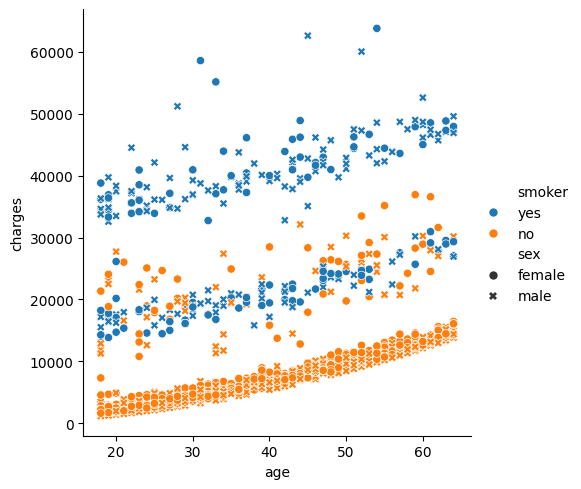

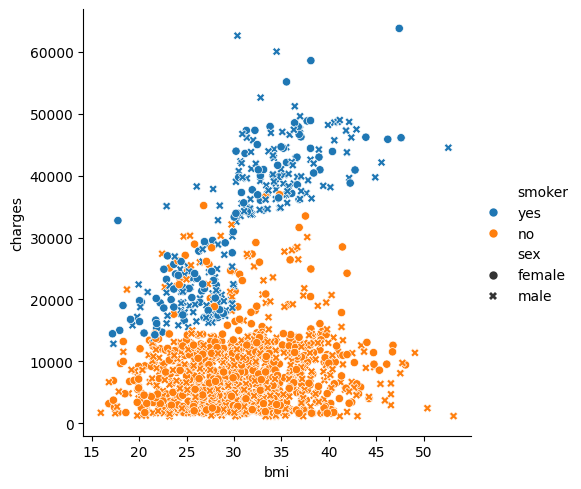

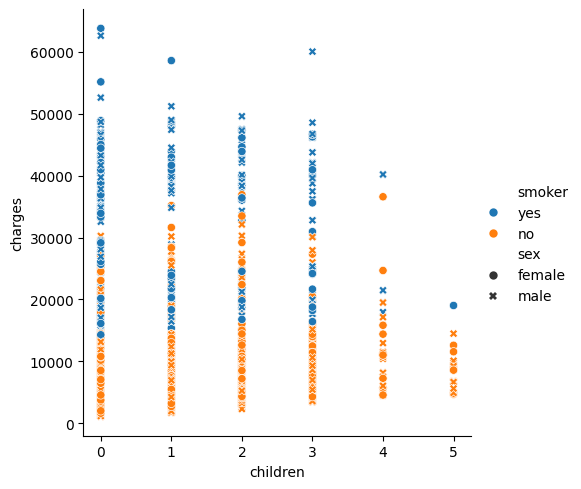

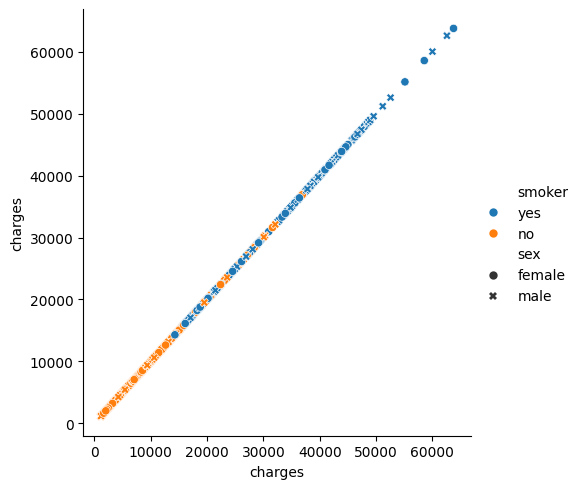

In [39]:
for i in range(0,len(numerical_var)):
    sns.relplot(x=numerical_var[i], y="charges", hue="smoker", style="sex", data=df)

plt.show()

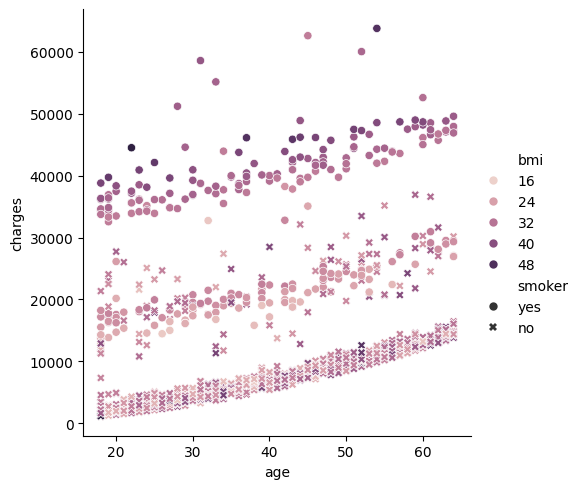

In [40]:
sns.relplot(x="age", y="charges", hue="bmi", style="smoker", data=df)

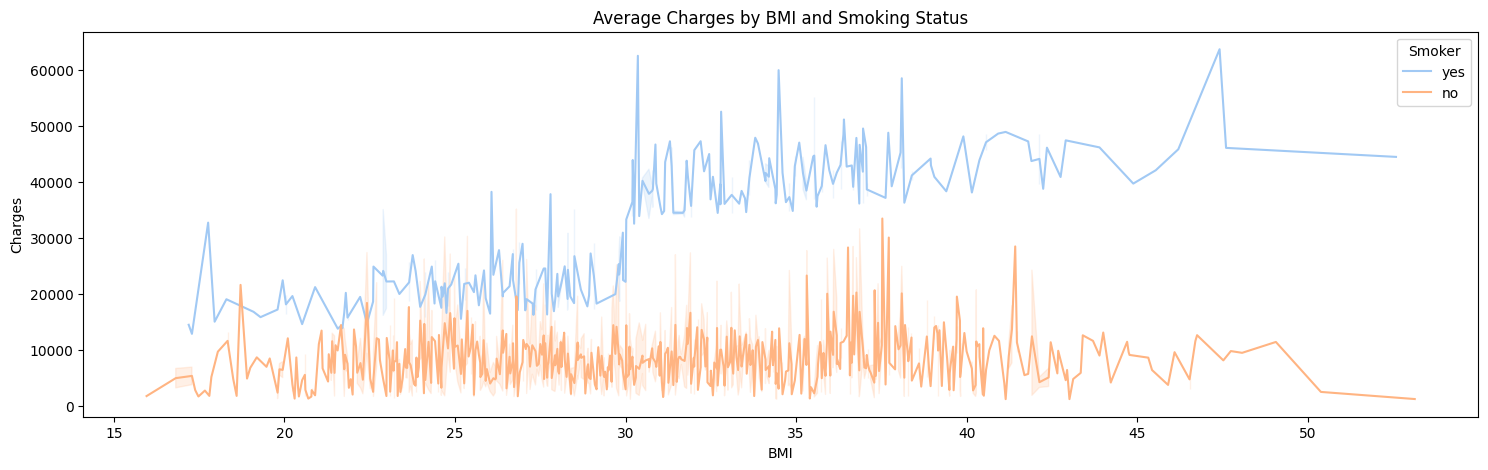

In [41]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df, x='bmi', y='charges', hue='smoker', palette='pastel')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average Charges by BMI and Smoking Status')
plt.legend(title='Smoker')
plt.grid(False)
plt.show()

C:\Users\Sergio\AppData\Local\Temp\ipykernel_20956\4146973565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="charges", palette="pastel")


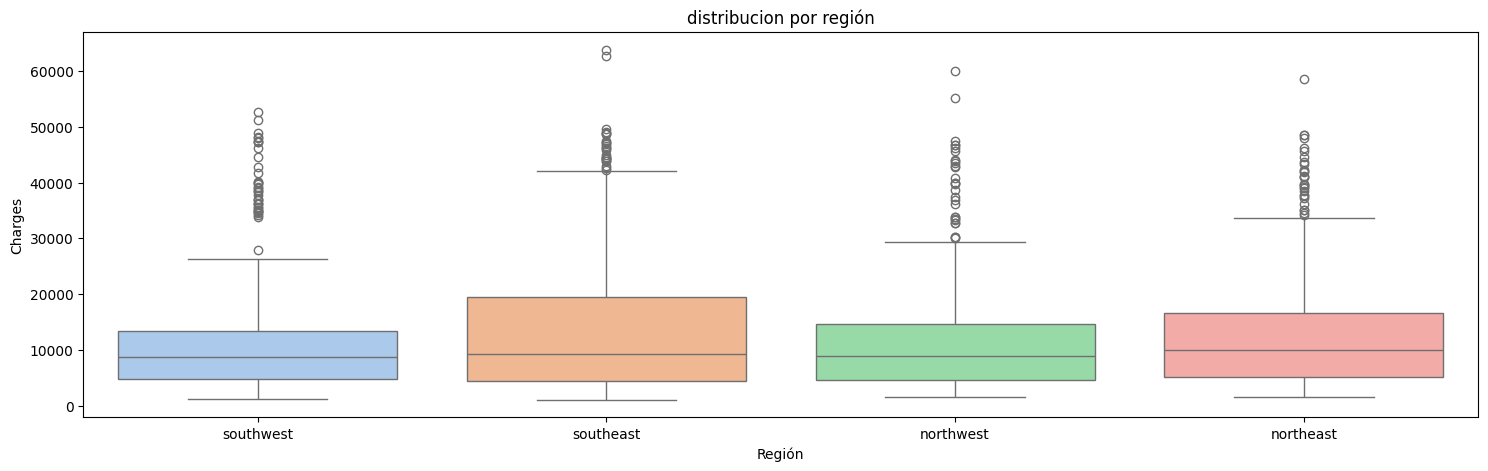

In [42]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df, x="region", y="charges", palette="pastel")
plt.title("distribucion por región")
plt.xlabel("Región")
plt.ylabel("Charges")
plt.show()

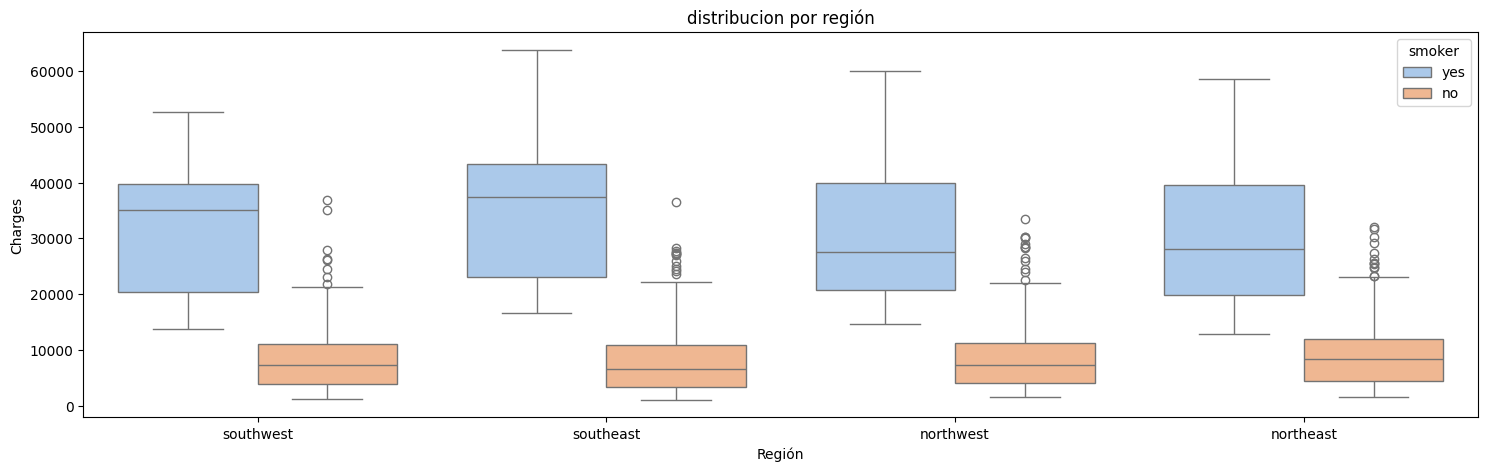

In [43]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df, x="region", y="charges", palette="pastel", hue="smoker")
plt.title("distribucion por región")
plt.xlabel("Región")
plt.ylabel("Charges")
plt.show()

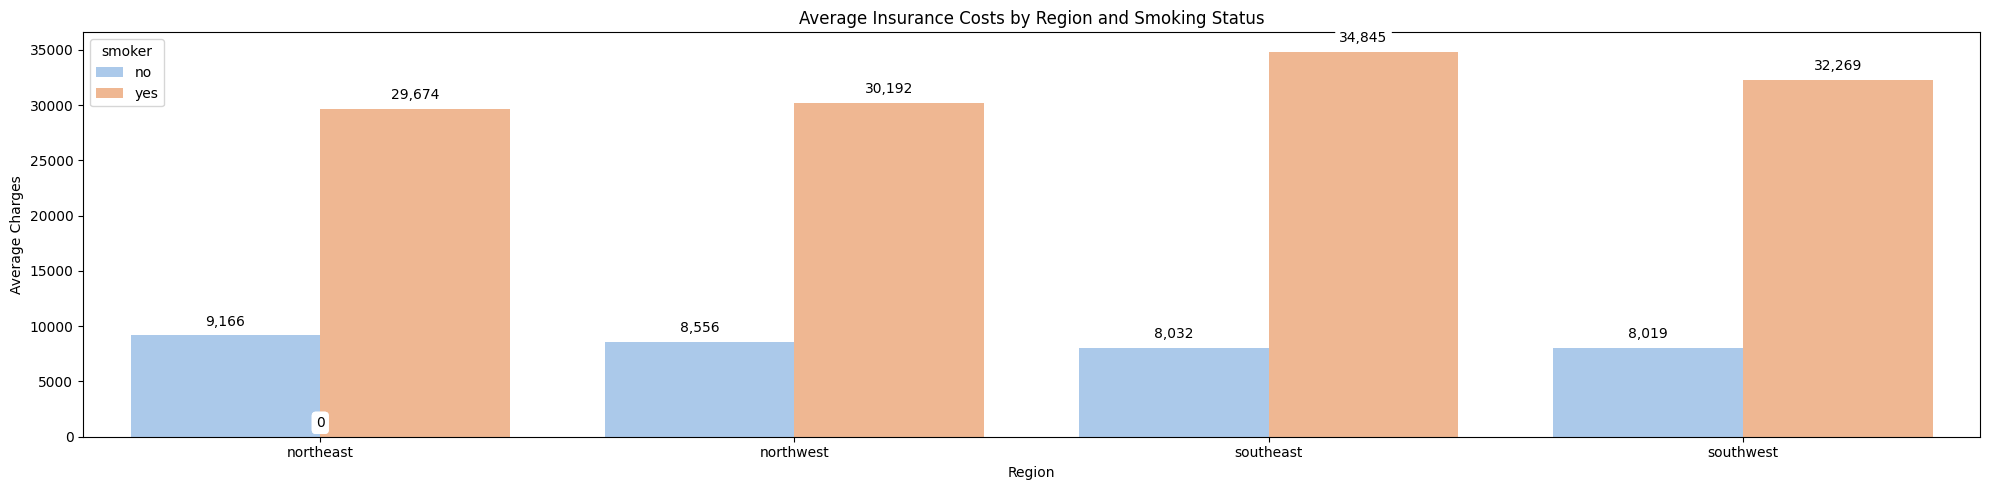

In [44]:
# Calcular los costos promedio de seguros por región y estado de fumador
avg_costs = df.groupby(['region', 'smoker'])['charges'].mean().reset_index()
# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 5))
# Gráfico de barras agrupadas
sns.barplot(data=avg_costs, x='region', y='charges', hue='smoker', palette="pastel", ax=ax)
# Configuración de los ejes y título
ax.set_title('Average Insurance Costs by Region and Smoking Status')
ax.set_xlabel('Region')
ax.set_ylabel('Average Charges')
# Añadir etiquetas con la media en cada barra
for p in ax.patches:
    height = p.get_height()
# Añadir etiquetas con formato sin decimales y puntos en miles
    ax.annotate(f'{height:,.0f}',  # Formato con puntos en miles y sin decimales
                (p.get_x() + p.get_width() / 2., height),  # Posición
                ha='center', va='center',
                xytext=(0, 10),  # Desplazamiento del texto
                textcoords='offset points',
                fontsize=10,  # Tamaño de fuente
                color='black',  # Color del texto
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white')  # Estilo del fondo
               )

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

#### Correlation matrix

In [47]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

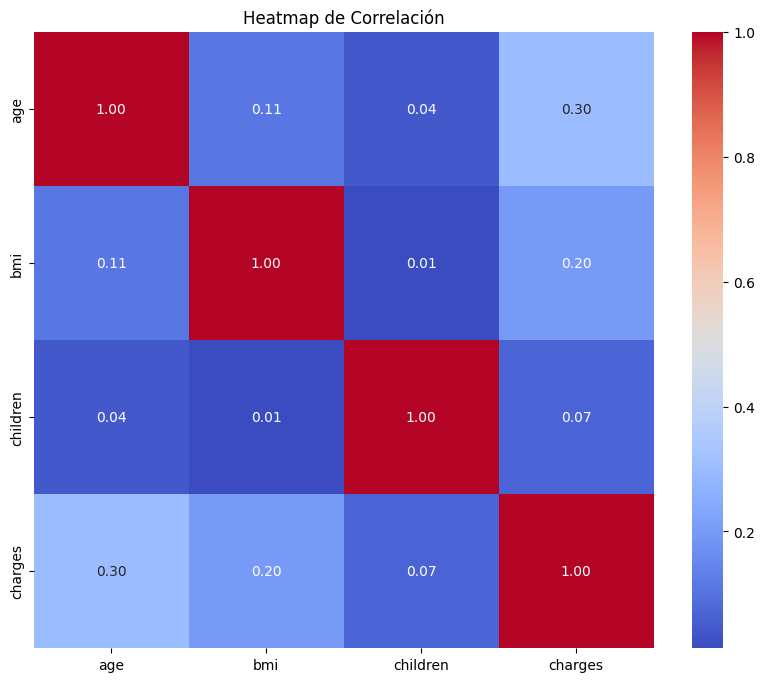

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
# Calcular la matriz de correlación
corr_matrix = df.drop(columns=['sex', 'smoker','region']).corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlación')
plt.show()

##### Correlation matrix. All numeric (ejecutar primero preprocessing)

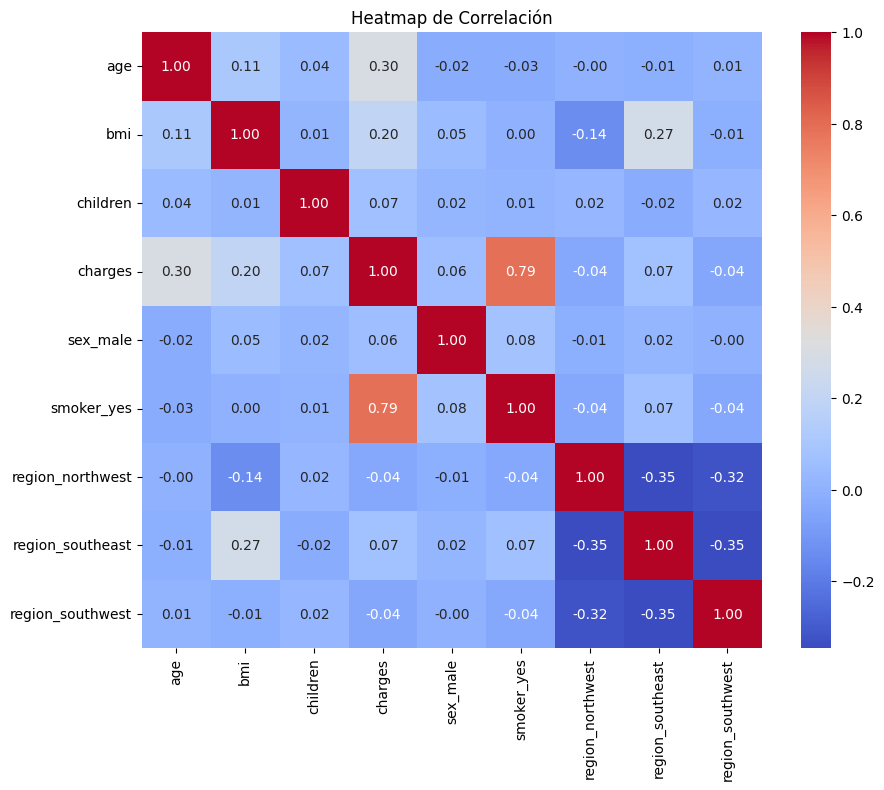

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
# Calcular la matriz de correlación
corr_matrix = df_all_numeric.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlación')
plt.show()

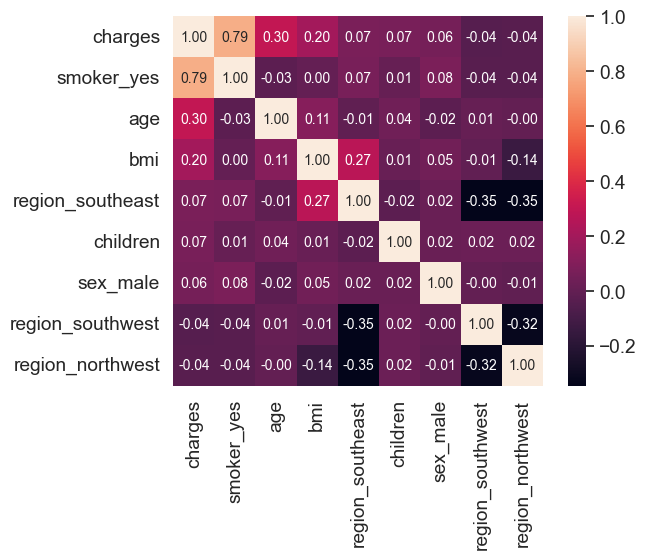

In [61]:
correlation_matrix = df_all_numeric.corr()
#Ampliación matriz, para variable que se selecciona muestra las k variables más correlacionadas, Substituye 'NOMBREVARIABLE' por el nombre de la variable a estudiar
k = 10 #numero de variables
## Target_Enrolled
cols = abs(correlation_matrix["charges"]).sort_values(ascending=False).nlargest(k).index
#nlargest --> coge los valores más altos
cm = np.corrcoef(df_all_numeric[cols].values.T) 
sns.set(font_scale=1.25)
#y mapa de calor
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##### Correlation matrix. All numeric scaled (ejecutar primero preprocessing)

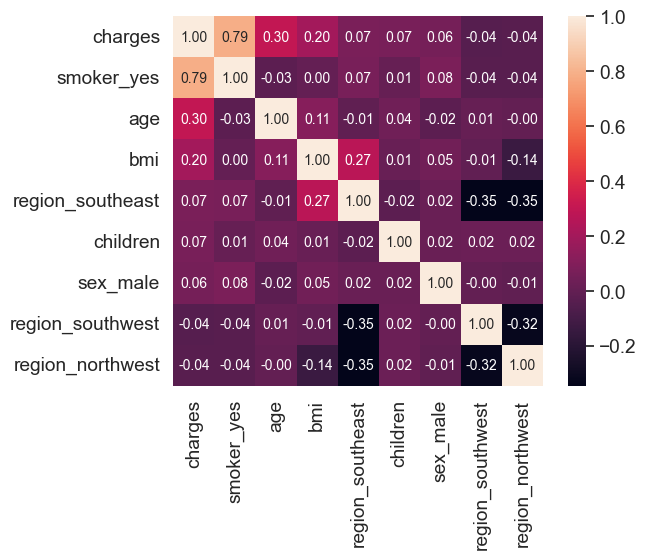

In [62]:
correlation_matrix = df_all_numeric_scaled.corr()
#Ampliación matriz, para variable que se selecciona muestra las k variables más correlacionadas, Substituye 'NOMBREVARIABLE' por el nombre de la variable a estudiar
k = 10 #numero de variables
## Target_Enrolled
cols = abs(correlation_matrix["charges"]).sort_values(ascending=False).nlargest(k).index
#nlargest --> coge los valores más altos
cm = np.corrcoef(df_all_numeric_scaled[cols].values.T) 
sns.set(font_scale=1.25)
#y mapa de calor
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Preprocessing

### Dummies (OneHotEncoder)

In [52]:
from sklearn.preprocessing import OneHotEncoder
dummies_object = OneHotEncoder(sparse_output=False, #por defecto el formato el formato es sparse
                               drop='first', # no creamos una nueva columna con la primera categoria que encuentra
                               handle_unknown='ignore') # ignora nuevas categorias en el test

In [53]:
dummies_object.fit(df[categorical_var])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [54]:
dummies_object.transform(df[categorical_var])

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [55]:
new_columns = dummies_object.get_feature_names_out(categorical_var)

In [56]:
df_all_numeric = df.copy()
df_all_numeric[new_columns] = dummies_object.transform(df[categorical_var])
df_all_numeric = df_all_numeric.drop(columns=categorical_var)

In [57]:
df_all_numeric

age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400       0.0         1.0   
1      18  33.770         1   1725.55230       1.0         0.0   
2      28  33.000         3   4449.46200       1.0         0.0   
3      33  22.705         0  21984.47061       1.0         0.0   
4      32  28.880         0   3866.85520       1.0         0.0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830       1.0         0.0   
1334   18  31.920         0   2205.98080       0.0         0.0   
1335   18  36.850         0   1629.83350       0.0         0.0   
1336   21  25.800         0   2007.94500       0.0         0.0   
1337   61  29.070         0  29141.36030       0.0         1.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  
1                  0.0               1.0               0.0  
2                  0.0               1.0               0.0  
3                  1.0               0.0               0.0  
4                  1.0               0.0               0.0  
...                ...               ...               ...  
1333               1.0               0.0               0.0  
1334               0.0               0.0               0.0  
1335               0.0               1.0               0.0  
1336               0.0               0.0               1.0  
1337               1.0               0.0               0.0  

[1338 rows x 9 columns]

### Scaler

In [58]:
from sklearn.preprocessing import StandardScaler

scaler_object = StandardScaler()
scaler_object.fit(df_all_numeric)
df_all_numeric_scaled = pd.DataFrame(scaler_object.transform(df_all_numeric), columns=df_all_numeric.columns)

In [59]:
df_all_numeric_scaled

age       bmi  children   charges  sex_male  smoker_yes  \
0    -1.438764 -0.453320 -0.908614  0.298584 -1.010519    1.970587   
1    -1.509965  0.509621 -0.078767 -0.953689  0.989591   -0.507463   
2    -0.797954  0.383307  1.580926 -0.728675  0.989591   -0.507463   
3    -0.441948 -1.305531 -0.908614  0.719843  0.989591   -0.507463   
4    -0.513149 -0.292556 -0.908614 -0.776802  0.989591   -0.507463   
...        ...       ...       ...       ...       ...         ...   
1333  0.768473  0.050297  1.580926 -0.220551  0.989591   -0.507463   
1334 -1.509965  0.206139 -0.908614 -0.914002 -1.010519   -0.507463   
1335 -1.509965  1.014878 -0.908614 -0.961596 -1.010519   -0.507463   
1336 -1.296362 -0.797813 -0.908614 -0.930362 -1.010519   -0.507463   
1337  1.551686 -0.261388 -0.908614  1.311053 -1.010519    1.970587   

      region_northwest  region_southeast  region_southwest  
0            -0.566418         -0.611324          1.765481  
1            -0.566418          1.635795         -0.566418  
2            -0.566418          1.635795         -0.566418  
3             1.765481         -0.611324         -0.566418  
4             1.765481         -0.611324         -0.566418  
...                ...               ...               ...  
1333          1.765481         -0.611324         -0.566418  
1334         -0.566418         -0.611324         -0.566418  
1335         -0.566418          1.635795         -0.566418  
1336         -0.566418         -0.611324          1.765481  
1337          1.765481         -0.611324         -0.566418  

[1338 rows x 9 columns]

## PCA

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def pca_results(data, pca):   
    """
    data: datos escalados
    pca: objeto pca
    """
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]  
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


# biplot
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T
    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,
    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

In [64]:
from sklearn.decomposition import PCA

In [65]:
df_all_numeric_scaled_wo_y = df_all_numeric_scaled.drop(columns="charges")

In [66]:
len(df_all_numeric_scaled_wo_y.columns)

8

In [67]:
pca = PCA(n_components=8).fit(df_all_numeric_scaled_wo_y)
pca_samples = pca.transform(df_all_numeric_scaled_wo_y)

In [68]:
df_components = pd.DataFrame(pca.components_,columns=df_all_numeric_scaled_wo_y.columns)

In [69]:
df_components

age       bmi  children  sex_male  smoker_yes  region_northwest  \
0  0.068419  0.488624 -0.036457  0.091927    0.144787         -0.474583   
1  0.063869  0.060011  0.033700 -0.014186   -0.077796         -0.560494   
2  0.671172  0.308729  0.271347 -0.351308   -0.481869          0.146100   
3  0.286960  0.131384  0.569318  0.598504    0.416173          0.140453   
4 -0.383564 -0.188738  0.753072 -0.450113    0.048996         -0.134335   
5  0.394589 -0.134340 -0.176560 -0.508667    0.730273         -0.019167   
6 -0.393698  0.757824 -0.034980 -0.219841    0.178573          0.323610   
7  0.024516 -0.130776 -0.016385  0.007103   -0.000278          0.544434   

   region_southeast  region_southwest  
0          0.685558         -0.174940  
1         -0.215390          0.790180  
2         -0.035071         -0.048944  
3         -0.149353          0.053181  
4          0.159161         -0.041940  
5         -0.046621          0.022301  
6         -0.248318          0.151251  
7          0.609027          0.560941

<Axes: >

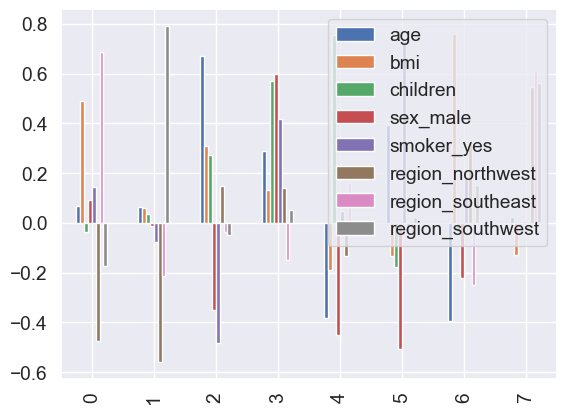

In [70]:
df_components.plot.bar()

Explained Variance     age     bmi  children  sex_male  \
Dimension 1              0.1922  0.0684  0.4886   -0.0365    0.0919   
Dimension 2              0.1659  0.0639  0.0600    0.0337   -0.0142   
Dimension 3              0.1370  0.6712  0.3087    0.2713   -0.3513   
Dimension 4              0.1328  0.2870  0.1314    0.5693    0.5985   
Dimension 5              0.1194 -0.3836 -0.1887    0.7531   -0.4501   
Dimension 6              0.1158  0.3946 -0.1343   -0.1766   -0.5087   
Dimension 7              0.0978 -0.3937  0.7578   -0.0350   -0.2198   
Dimension 8              0.0392  0.0245 -0.1308   -0.0164    0.0071   

             smoker_yes  region_northwest  region_southeast  region_southwest  
Dimension 1      0.1448           -0.4746            0.6856           -0.1749  
Dimension 2     -0.0778           -0.5605           -0.2154            0.7902  
Dimension 3     -0.4819            0.1461           -0.0351           -0.0489  
Dimension 4      0.4162            0.1405           -0.1494            0.0532  
Dimension 5      0.0490           -0.1343            0.1592           -0.0419  
Dimension 6      0.7303           -0.0192           -0.0466            0.0223  
Dimension 7      0.1786            0.3236           -0.2483            0.1513  
Dimension 8     -0.0003            0.5444            0.6090            0.5609

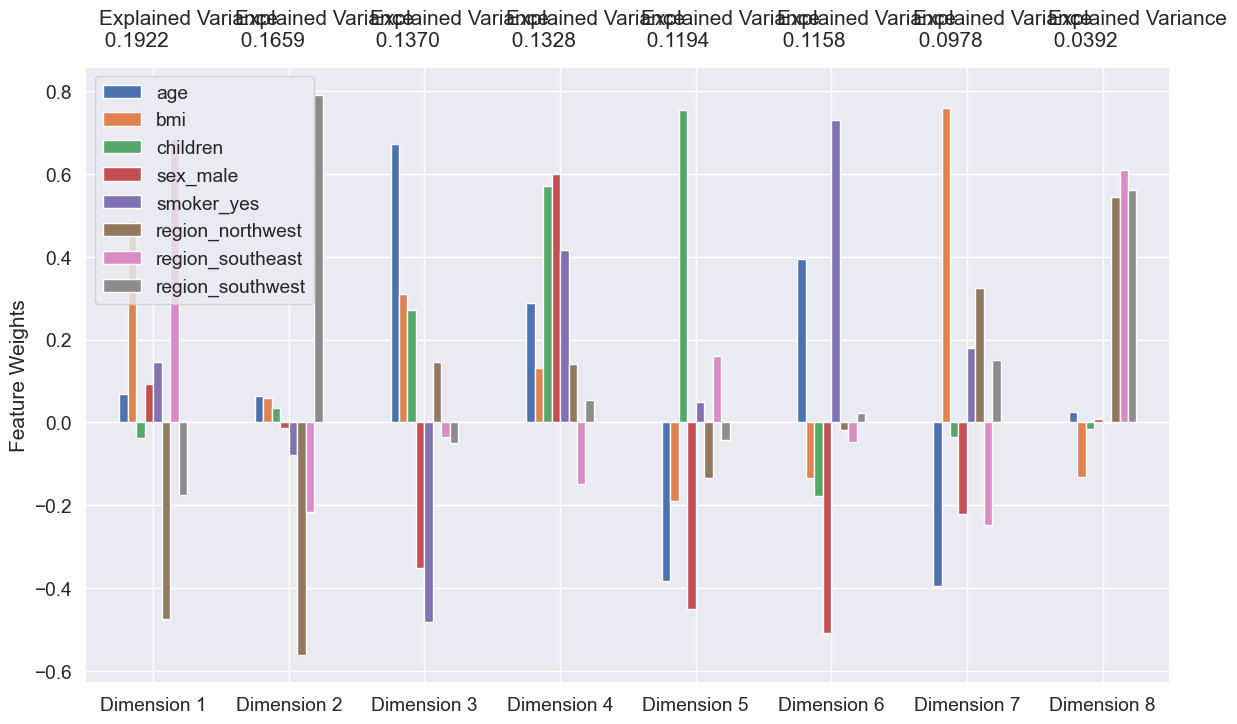

In [71]:
pca_results(df_all_numeric_scaled_wo_y, pca)

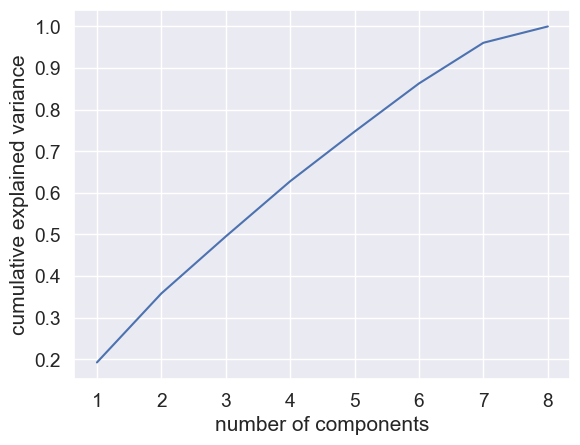

array([0.19216849, 0.35803641, 0.49504904, 0.62782657, 0.74718808,
       0.86298045, 0.96076588, 1.        ])

In [73]:
#Explained variance
plt.plot(range(1,9), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
np.cumsum(pca.explained_variance_ratio_)

## Feature Engineering

### Polynomial Features

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_object = PolynomialFeatures(degree=2, # grado del polinomio
                                    include_bias=False, # si hace la columna de constante 1
                                    interaction_only=True) # si solo hace multiplicaciones entre variables

In [75]:
poly_object.fit(df_all_numeric_scaled_wo_y)
poly_object.transform(df_all_numeric_scaled_wo_y)

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.34626466,
        -1.        , -1.07928031],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.92654335,
         0.32082922, -0.92654335],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.92654335,
         0.32082922, -0.92654335],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.92654335,
         0.32082922, -0.92654335],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.34626466,
        -1.        , -1.07928031],
       [ 1.55168573, -0.26138796, -0.90861367, ..., -1.07928031,
        -1.        ,  0.34626466]])

In [76]:
columns_poly = poly_object.get_feature_names_out()

In [77]:
X_polynomial = df_all_numeric_scaled_wo_y.copy()

In [78]:
X_polynomial[columns_poly] = poly_object.transform(X_polynomial)

In [79]:
df_polynomial = X_polynomial.copy()

In [80]:
df_polynomial["charges"] = df_all_numeric_scaled["charges"]

##### Correlation matrix

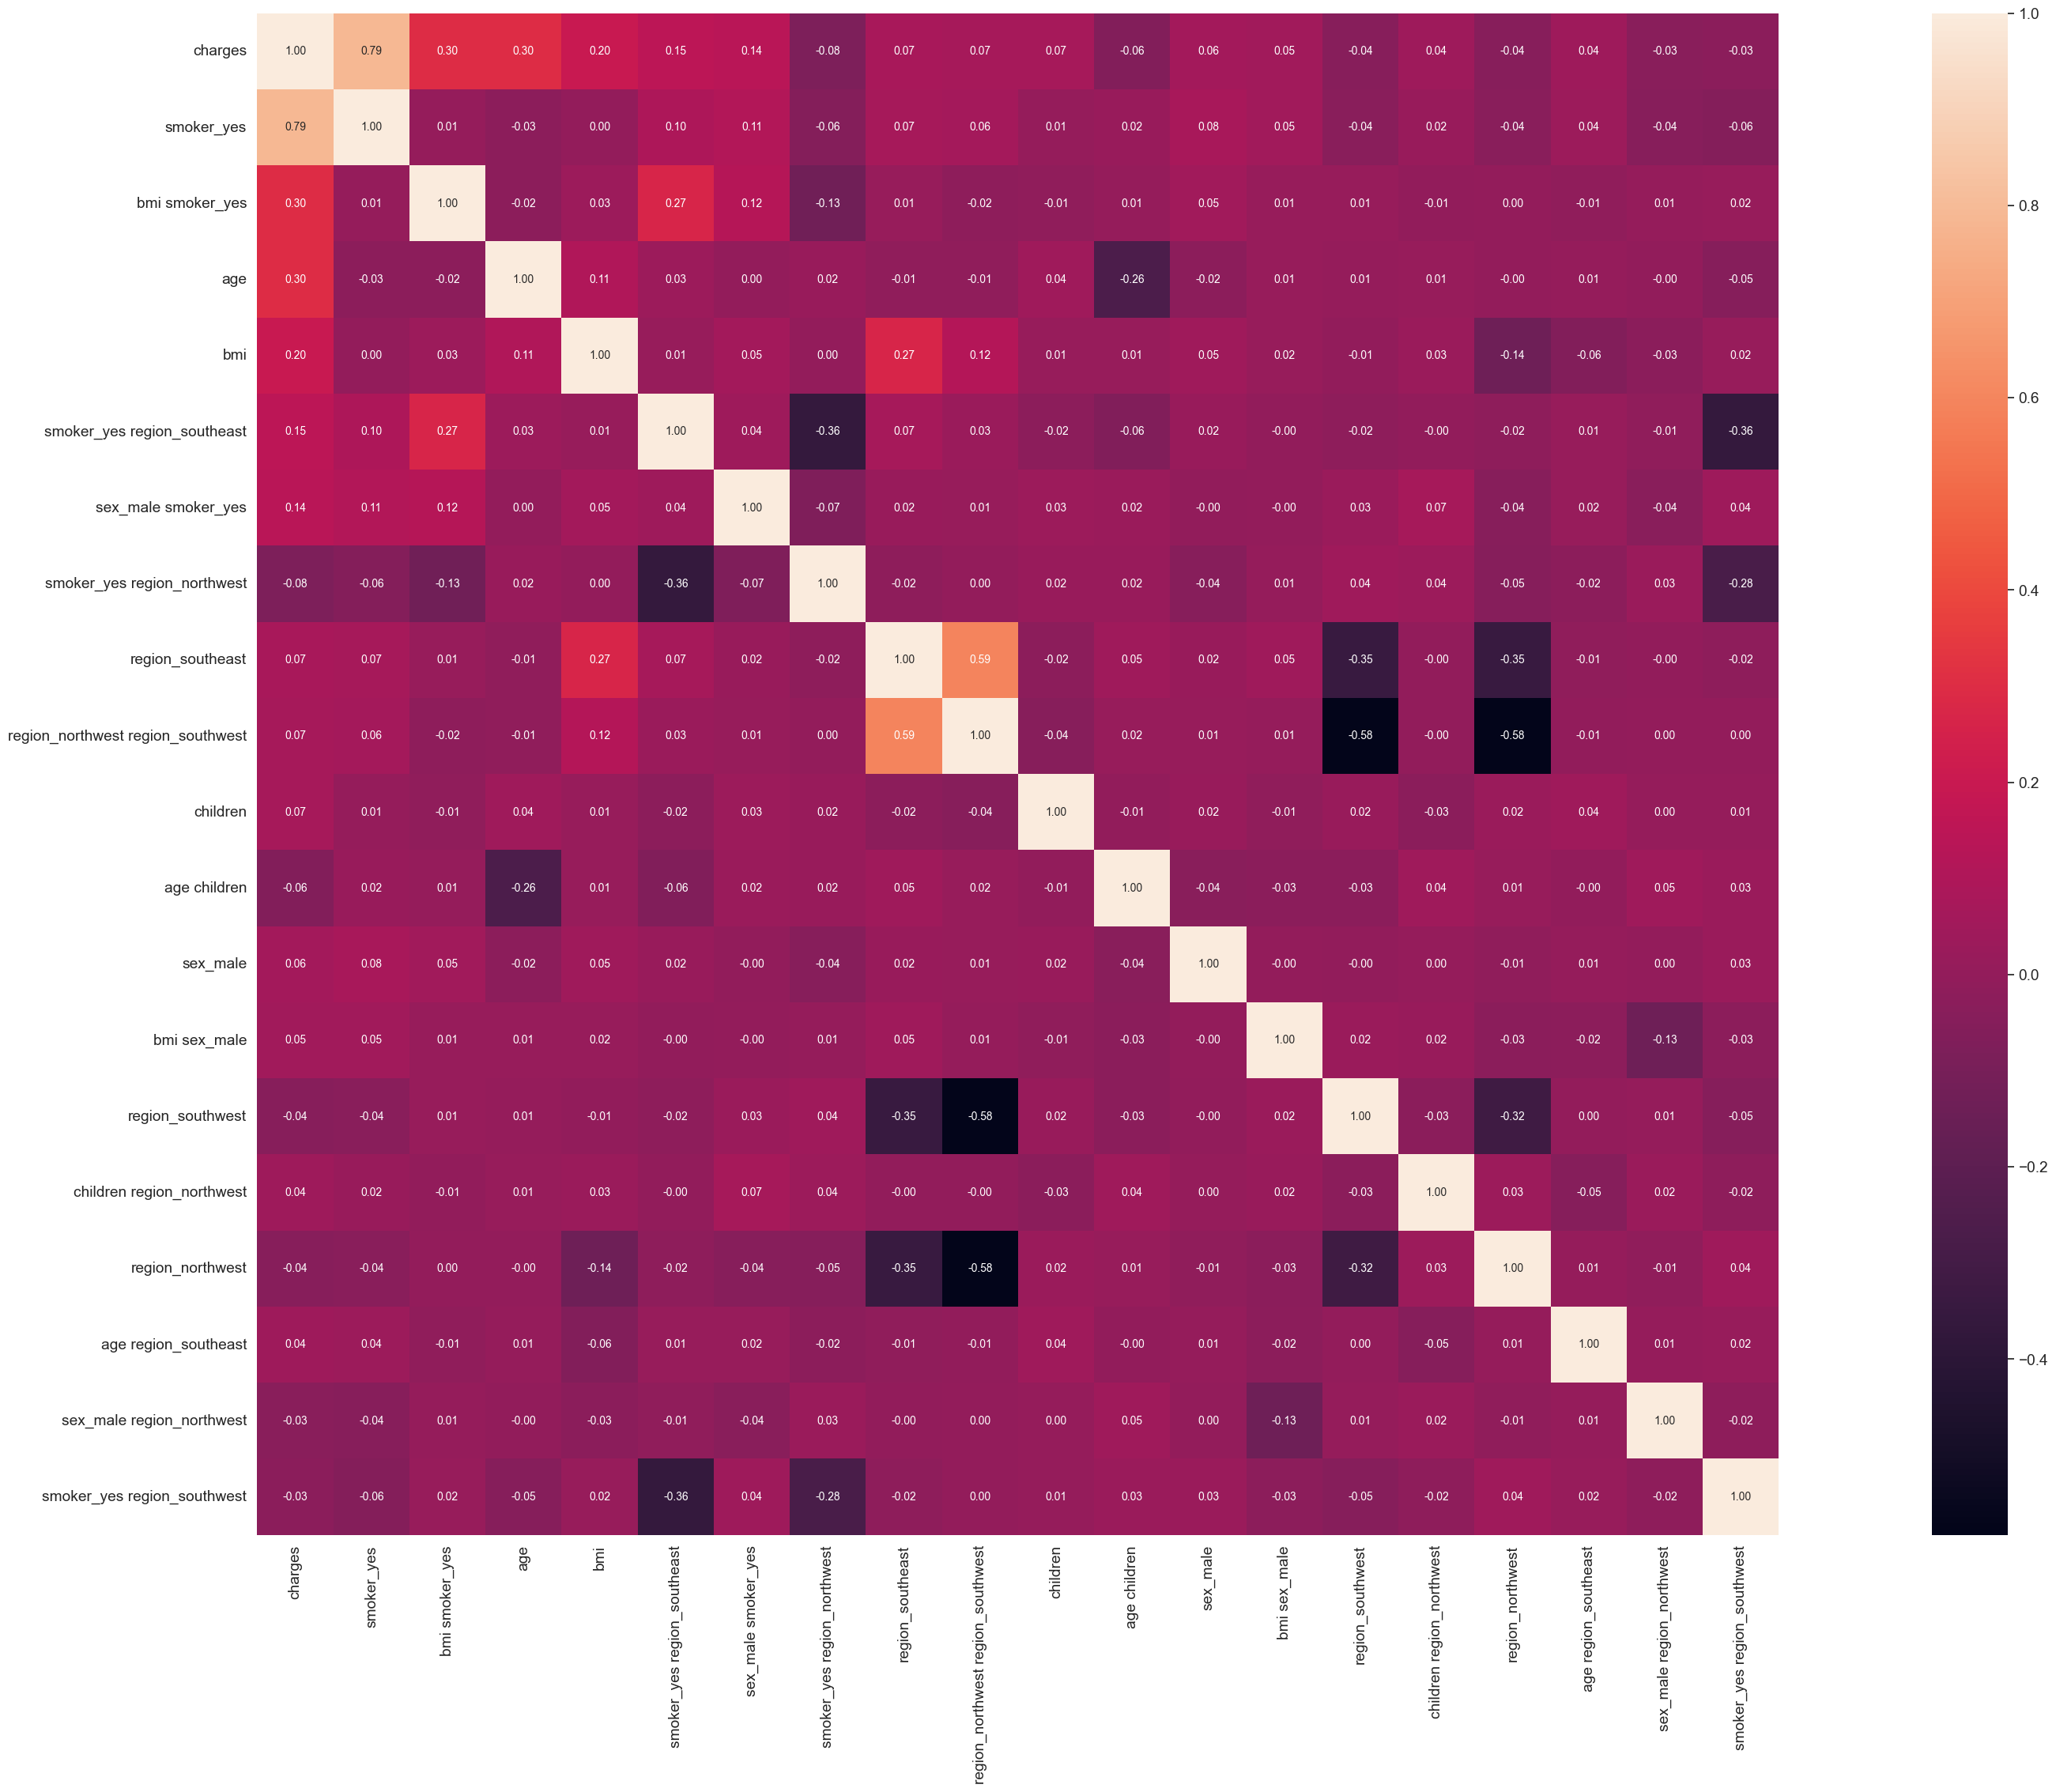

In [81]:
fig, ax = plt.subplots(figsize=(50,25))
correlation_matrix = df_polynomial.corr()
#Ampliación matriz, para variable que se selecciona muestra las k variables más correlacionadas, Substituye 'NOMBREVARIABLE' por el nombre de la variable a estudiar
k = 20 #numero de variables
## Target_Enrolled
cols = abs(correlation_matrix["charges"]).sort_values(ascending=False).nlargest(k).index
#nlargest --> coge los valores más altos
cm = np.corrcoef(df_polynomial[cols].values.T) 
sns.set(font_scale=1.25)
#y mapa de calor
fig
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Scatter plots

In [84]:

cols_2 = abs(correlation_matrix["charges"]).sort_values(ascending=False).nlargest(10).index



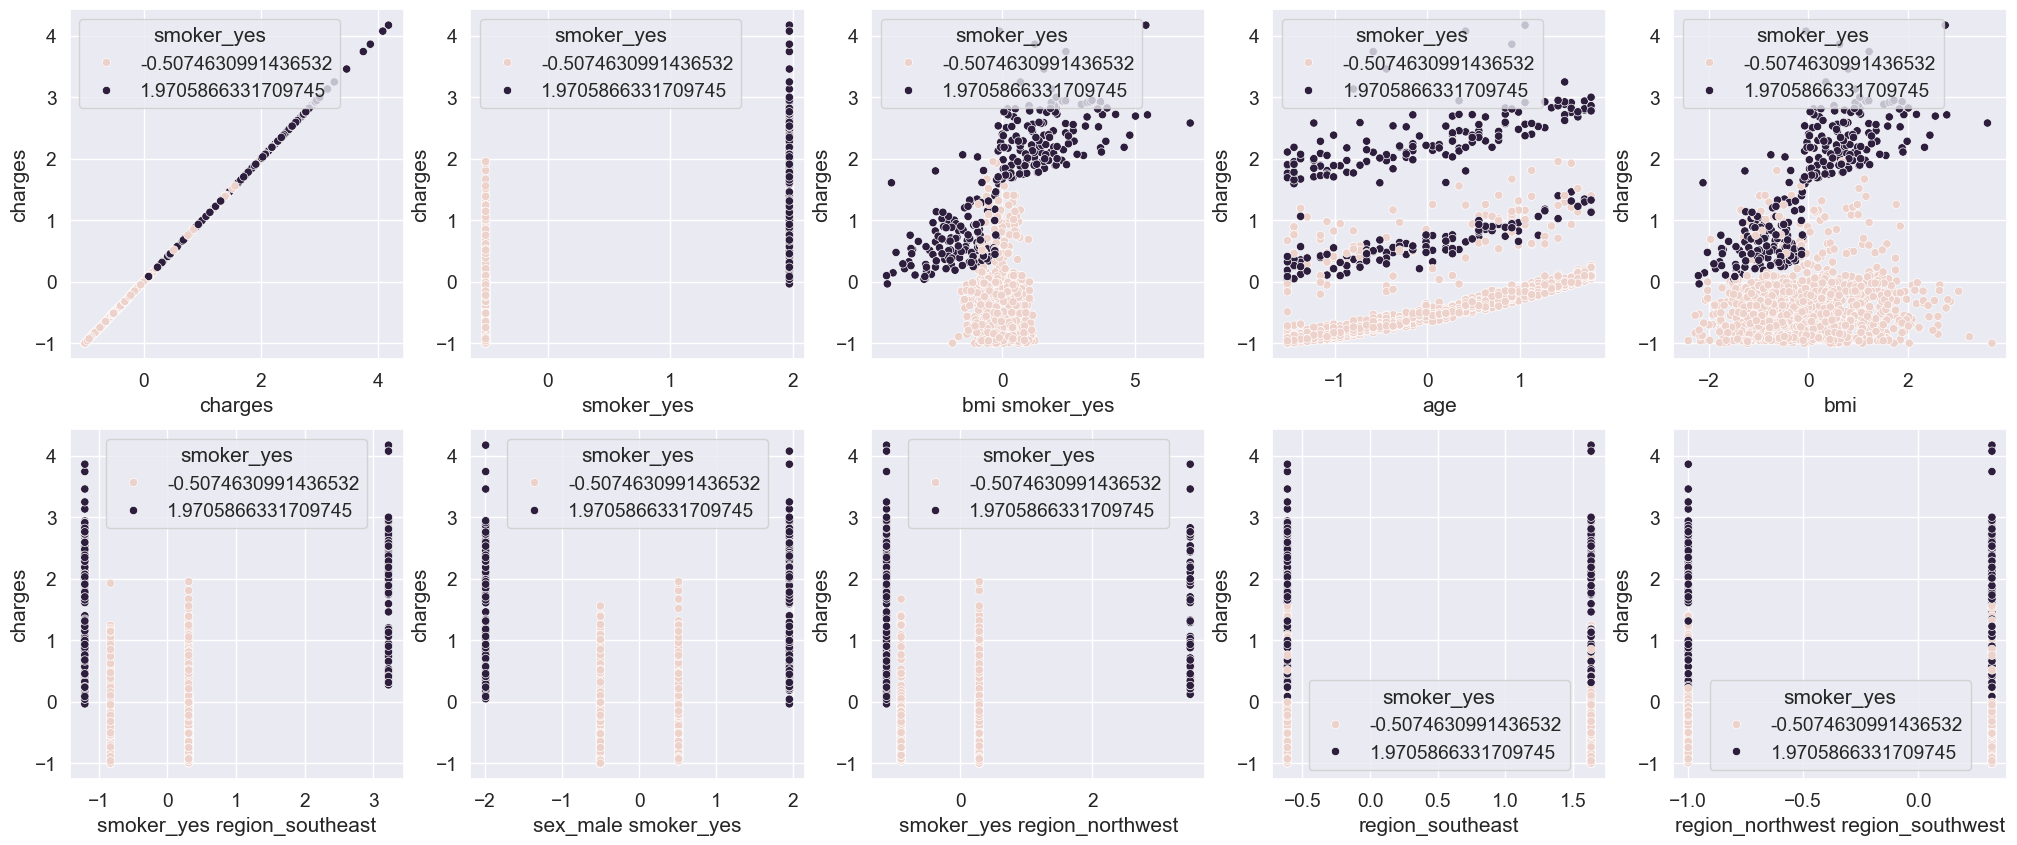

In [85]:
fig, ax = plt.subplots(2,5,figsize=(25,10))
ax = ax.flatten()

for i in range(0,len(cols_2)):
    sns.scatterplot(x=cols_2[i], y="charges", ax=ax[i], hue="smoker_yes", data=df_polynomial)

plt.show()

## Pipeline

train-test - > onehotencoder -> scaler -> feature engineering -> quitar columnas

In [86]:
numerical_var

['age', 'bmi', 'children', 'charges']

In [87]:
categorical_var

['sex', 'smoker', 'region']

In [88]:
numeric_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]   #### rehacer con minmax
)

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [89]:
numeric_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy="median")), 
           ("scaler", MinMaxScaler())]  
)

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [90]:
categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")),
           ("oneHotEncoder", OneHotEncoder(drop = "first", handle_unknown="ignore"))]
)

categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('oneHotEncoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [91]:
numerical_var

['age', 'bmi', 'children', 'charges']

In [92]:
numerical_var = ["age", "bmi", "children"]

In [93]:
preprocessor = ColumnTransformer(
    transformers=[
        ("pipeline para numericas", numeric_transformer, numerical_var),
        ("pipeline para categoricas", categorical_transformer, categorical_var)
        # 3 elementos (nombre, pipeline, lista_de_nombres_columnas)
    ]
)
preprocessor

ColumnTransformer(transformers=[('pipeline para numericas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('pipeline para categoricas',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['sex', 'smoker', 'region'])])

In [94]:
X = df.drop(columns="charges")
y = df["charges"]

In [95]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('pipeline para numericas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('pipeline para categoricas',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['sex', 'smoker', 'region'])])

In [96]:
X_transformed = preprocessor.transform(X)

In [97]:
X_transformed

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [98]:
X_transformed = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

In [99]:
X_transformed

pipeline para numericas__age  pipeline para numericas__bmi  \
0                         0.021739                      0.321227   
1                         0.000000                      0.479150   
2                         0.217391                      0.458434   
3                         0.326087                      0.181464   
4                         0.304348                      0.347592   
...                            ...                           ...   
1333                      0.695652                      0.403820   
1334                      0.000000                      0.429379   
1335                      0.000000                      0.562012   
1336                      0.065217                      0.264730   
1337                      0.934783                      0.352704   

      pipeline para numericas__children  pipeline para categoricas__sex_male  \
0                                   0.0                                  0.0   
1                                   0.2                                  1.0   
2                                   0.6                                  1.0   
3                                   0.0                                  1.0   
4                                   0.0                                  1.0   
...                                 ...                                  ...   
1333                                0.6                                  1.0   
1334                                0.0                                  0.0   
1335                                0.0                                  0.0   
1336                                0.0                                  0.0   
1337                                0.0                                  0.0   

      pipeline para categoricas__smoker_yes  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
1333                                    0.0   
1334                                    0.0   
1335                                    0.0   
1336                                    0.0   
1337                                    1.0   

      pipeline para categoricas__region_northwest  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             1.0   
4                                             1.0   
...                                           ...   
1333                                          1.0   
1334                                          0.0   
1335                                          0.0   
1336                                          0.0   
1337                                          1.0   

      pipeline para categoricas__region_southeast  \
0                                             0.0   
1                                             1.0   
2                                             1.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
1333                                          0.0   
1334                                          0.0   
1335                                          1.0   
1336                                          0.0   
1337                                          0.0   

      pipeline para categoricas__region_southwest  
0                                             1.0  
1                                             0.0  
2                                             0.0  
3                                             0.0  
4                                             0.0  
...                                           ...  
1333                     

#### Pipelines with regression algorithms

In [102]:
LR_model = Pipeline(
    steps = [("preprocessor", preprocessor), 
           ("LR_model", LinearRegression())]
)

KNNR_model = Pipeline(
    steps = [("preprocessor", preprocessor), 
           ("KNNR_model", KNeighborsRegressor())]
)

RFR_model = Pipeline(
    steps = [("preprocessor", preprocessor), 
           ("RFR_model", RandomForestRegressor())]
)

GBR_model = Pipeline(
    steps = [("preprocessor", preprocessor), 
           ("GBR_model", GradientBoostingRegressor())]
)

XGBR_model = Pipeline(
    steps = [("preprocessor", preprocessor), 
           ("XGBR_model", XGBRegressor())]
)

## Train Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

## Linear Regression

In [104]:
LR_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline para numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('pipeline para categoricas',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('LR_model', LinearRegression())])

In [105]:
y_hat_LR_train = LR_model.predict(X_train)
y_hat_LR_train

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

In [106]:
y_hat_LR_test = LR_model.predict(X_test)
y_hat_LR_test

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [107]:
print("model error_train:", mean_squared_error(y_train,y_hat_LR_train))
print("model r2_score_train:", r2_score(y_train,y_hat_LR_train))

print("model error_test:", mean_squared_error(y_test,y_hat_LR_test))
print("model r2_score_test:", r2_score(y_test,y_hat_LR_test))

model error_train: 37277681.70201866
model r2_score_train: 0.7417255854683333
model error_test: 33596915.85136147
model r2_score_test: 0.7835929767120723


## KNN Regressor

In [108]:
KNNR_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline para numericas',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('pipeline para categoricas',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('KNNR_model', KNeighborsRegressor())])

In [109]:
y_hat_KNNR_train = KNNR_model.predict(X_train)
y_hat_KNNR_train
y_hat_KNNR_test = KNNR_model.predict(X_test)
y_hat_KNNR_test

print("model error_train:", mean_squared_error(y_train,y_hat_KNNR_train))
print("model r2_score_train:", r2_score(y_train,y_hat_KNNR_train))

print("model error_test:", mean_squared_error(y_test,y_hat_KNNR_test))
print("model r2_score_test:", r2_score(y_test,y_hat_KNNR_test))


model error_train: 22641474.03382642
model r2_score_train: 0.8431309785580421
model error_test: 33220062.497408804
model r2_score_test: 0.7860203933507237


## Random Forest Regressor

In [110]:
RFR_model.fit(X_train, y_train)

y_hat_RFR_train = RFR_model.predict(X_train)
y_hat_RFR_train
y_hat_RFR_test = RFR_model.predict(X_test)
y_hat_RFR_test

print("model error_train:", mean_squared_error(y_train,y_hat_RFR_train))
print("model r2_score_train:", r2_score(y_train,y_hat_RFR_train))

print("model error_test:", mean_squared_error(y_test,y_hat_RFR_test))
print("model r2_score_test:", r2_score(y_test,y_hat_RFR_test))

model error_train: 3576834.216266055
model r2_score_train: 0.9752182882383236
model error_test: 21329756.699535258
model r2_score_test: 0.8626091402191876


## Gradient Boosting Regressor

In [111]:
GBR_model.fit(X_train, y_train)

y_hat_GBR_train = GBR_model.predict(X_train)
y_hat_GBR_train
y_hat_GBR_test = GBR_model.predict(X_test)
y_hat_GBR_test

print("model error_train:", mean_squared_error(y_train,y_hat_GBR_train))
print("model r2_score_train:", r2_score(y_train,y_hat_GBR_train))

print("model error_test:", mean_squared_error(y_test,y_hat_GBR_test))
print("model r2_score_test:", r2_score(y_test,y_hat_GBR_test))

model error_train: 14488502.50739763
model r2_score_train: 0.8996179662552334
model error_test: 18787669.035616662
model r2_score_test: 0.8789834296545462


## XGBoost Regressor

In [112]:
XGBR_model.fit(X_train, y_train)

y_hat_XGBR_train = XGBR_model.predict(X_train)
y_hat_XGBR_train
y_hat_XGBR_test = XGBR_model.predict(X_test)
y_hat_XGBR_test

print("model error_train:", mean_squared_error(y_train,y_hat_XGBR_train))
print("model r2_score_train:", r2_score(y_train,y_hat_XGBR_train))

print("model error_test:", mean_squared_error(y_test,y_hat_XGBR_test))
print("model r2_score_test:", r2_score(y_test,y_hat_XGBR_test))

model error_train: 818517.674752594
model r2_score_train: 0.9943289881886861
model error_test: 23434704.61742758
model r2_score_test: 0.8490505887407566


## Results

In [113]:
LR_model_results = [mean_squared_error(y_train,y_hat_LR_train), r2_score(y_train,y_hat_LR_train), mean_squared_error(y_test,y_hat_LR_test), r2_score(y_test,y_hat_LR_test)]
KNNR_model_results = [mean_squared_error(y_train,y_hat_KNNR_train), r2_score(y_train,y_hat_KNNR_train), mean_squared_error(y_test,y_hat_KNNR_test), r2_score(y_test,y_hat_KNNR_test)]
RFR_model_results = [mean_squared_error(y_train,y_hat_RFR_train), r2_score(y_train,y_hat_RFR_train), mean_squared_error(y_test,y_hat_RFR_test), r2_score(y_test,y_hat_RFR_test)]
GBR_model_results = [mean_squared_error(y_train,y_hat_GBR_train), r2_score(y_train,y_hat_GBR_train), mean_squared_error(y_test,y_hat_GBR_test), r2_score(y_test,y_hat_GBR_test)]
XGBR_model_results = [mean_squared_error(y_train,y_hat_XGBR_train), r2_score(y_train,y_hat_XGBR_train), mean_squared_error(y_test,y_hat_XGBR_test), r2_score(y_test,y_hat_XGBR_test)]

In [114]:
df_model_results = pd.DataFrame([LR_model_results, KNNR_model_results, RFR_model_results, GBR_model_results, XGBR_model_results], 
                                columns=["MSE_train", "R2_score_train","MSE_test","R2_score_test"], 
                                index=["LR", "KNNR", "RFR", "GBR", "XGBR"])

In [115]:
df_model_results.sort_values("R2_score_test", ascending=False)

MSE_train  R2_score_train      MSE_test  R2_score_test
GBR   1.448850e+07        0.899618  1.878767e+07       0.878983
RFR   3.576834e+06        0.975218  2.132976e+07       0.862609
XGBR  8.185177e+05        0.994329  2.343470e+07       0.849051
KNNR  2.264147e+07        0.843131  3.322006e+07       0.786020
LR    3.727768e+07        0.741726  3.359692e+07       0.783593

In [116]:
list_of_models = [LR_model, KNNR_model, RFR_model, RFR_model, GBR_model, XGBR_model]

In [117]:
def run_model(model, X_train, y_train):
    L=[]
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    MSE_train = mean_squared_error(y_train,y_hat_train)
    R2_train = r2_score(y_train,y_hat_train)
    MSE_test = mean_squared_error(y_test,y_hat_test)
    R2_test = r2_score(y_test,y_hat_test)
    L.append(MSE_train)
    L.append(R2_train)
    L.append(MSE_test)
    L.append(R2_test)
    return L

In [118]:
results = {}
for elem in list_of_models:
    results[elem] = run_model(elem, X_train, y_train)


# Grid Search / Cross Validation

## XGBR

In [119]:
XGBR_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('pipeline para numericas',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('pipeline para categoricas',
                                    Pipeline(steps=[('imputer_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('oneHotEncoder',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['sex', 'smoker', 'region'])])),
  ('XGBR_model',
   XGBRegressor(base_score=None,

In [120]:
XGBR_model_params = {
    'XGBR_model__learning_rate': [0.05, 0.1],
    'XGBR_model__n_estimators': [100, 200],
    'XGBR_model__max_depth': [3, 5],
    'XGBR_model__min_child_weight': [1, 3],
    'XGBR_model__colsample_bytree': [0.8, 1.0],
    'XGBR_model__subsample': [0.8, 1.0],
    'XGBR_model__gamma': [0, 0.1],
    'XGBR_model__base_score': [None],
    'XGBR_model__booster': [None],
    'XGBR_model__callbacks': [None],
    'XGBR_model__colsample_bylevel': [None],
    'XGBR_model__colsample_bynode': [None],
    'XGBR_model__device': [None],
    'XGBR_model__early_stopping_rounds': [None],
    'XGBR_model__enable_categorical': [False],
    'XGBR_model__eval_metric': [None],
    'XGBR_model__feature_types': [None],
    'XGBR_model__grow_policy': [None],
    'XGBR_model__importance_type': [None],
    'XGBR_model__interaction_constraints': [None],
    'XGBR_model__max_bin': [None],
    'XGBR_model__max_cat_threshold': [None],
    'XGBR_model__max_cat_to_onehot': [None],
    'XGBR_model__max_delta_step': [None],
    'XGBR_model__max_leaves': [None],
    'XGBR_model__missing': [float('nan')],
    'XGBR_model__monotone_constraints': [None],
    'XGBR_model__multi_strategy': [None],
    'XGBR_model__n_jobs': [None]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}
 


In [121]:
XGBR_grid_solver = GridSearchCV(estimator=XGBR_model, 
                           param_grid = XGBR_model_params, 
                           scoring = scoring, 
                           cv=5, 
                           refit="r2", 
                           verbose=2)

XGBR_model_CV_result = XGBR_grid_solver.fit(X_train, y_train)



print("Mejor score:", XGBR_model_CV_result.best_score_)
print("Mejores parámetros:", XGBR_model_CV_result.best_params_)

print("Train score:", XGBR_model_CV_result.score(X_train, y_train))
print("Test score:", XGBR_model_CV_result.score(X_test, y_test))

print("Train MSE:", mean_squared_error(y_train, XGBR_model_CV_result.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, XGBR_model_CV_result.predict(X_test)))

print("Train R2:", r2_score(y_train, XGBR_model_CV_result.predict(X_train)))
print("Test R2:", r2_score(y_test, XGBR_model_CV_result.predict(X_test)))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END XGBR_model__base_score=None, XGBR_model__booster=None, XGBR_model__callbacks=None, XGBR_model__colsample_bylevel=None, XGBR_model__colsample_bynode=None, XGBR_model__colsample_bytree=0.8, XGBR_model__device=None, XGBR_model__early_stopping_rounds=None, XGBR_model__enable_categorical=False, XGBR_model__eval_metric=None, XGBR_model__feature_types=None, XGBR_model__gamma=0, XGBR_model__grow_policy=None, XGBR_model__importance_type=None, XGBR_model__interaction_constraints=None, XGBR_model__learning_rate=0.05, XGBR_model__max_bin=None, XGBR_model__max_cat_threshold=None, XGBR_model__max_cat_to_onehot=None, XGBR_model__max_delta_step=None, XGBR_model__max_depth=3, XGBR_model__max_leaves=None, XGBR_model__min_child_weight=1, XGBR_model__missing=nan, XGBR_model__monotone_constraints=None, XGBR_model__multi_strategy=None, XGBR_model__n_estimators=100, XGBR_model__n_jobs=None, XGBR_model__subsample=0.8; total time=   0.0s
[

In [122]:
XGBR_model_CV_results = [mean_squared_error(y_train, XGBR_model_CV_result.predict(X_train)),
                      r2_score(y_train, XGBR_model_CV_result.predict(X_train)), 
                      mean_squared_error(y_test, XGBR_model_CV_result.predict(X_test)), 
                      r2_score(y_test, XGBR_model_CV_result.predict(X_test))]

## RFR

In [123]:
RFR_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('pipeline para numericas',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('pipeline para categoricas',
                                    Pipeline(steps=[('imputer_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('oneHotEncoder',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['sex', 'smoker', 'region'])])),
  ('RFR_model', RandomForestRegressor())],
 'verb

In [124]:
RFR_model_params = {
    'RFR_model__bootstrap': [True],
    'RFR_model__ccp_alpha': [0.0],
    'RFR_model__criterion': ['squared_error'],
    'RFR_model__max_depth': [None, 10],
    'RFR_model__max_features': ['auto', 0.8],
    'RFR_model__min_samples_leaf': [1, 2],
    'RFR_model__min_samples_split': [2, 5],
    'RFR_model__n_estimators': [100, 200],
    'RFR_model__n_jobs': [-1],
    'RFR_model__oob_score': [True],
    'RFR_model__random_state': [42],
    'RFR_model__warm_start': [False]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

In [125]:
RFR_grid_solver = GridSearchCV(estimator=RFR_model, 
                           param_grid = RFR_model_params, 
                           scoring = scoring, 
                           cv=5, 
                           refit="r2", 
                           verbose=2)

RFR_model_CV_result = RFR_grid_solver.fit(X_train, y_train)



print("Mejor score:", RFR_model_CV_result.best_score_)
print("Mejores parámetros:", RFR_model_CV_result.best_params_)

print("Train score:", RFR_model_CV_result.score(X_train, y_train))
print("Test score:", RFR_model_CV_result.score(X_test, y_test))

print("Train MSE:", mean_squared_error(y_train, RFR_model_CV_result.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, RFR_model_CV_result.predict(X_test)))

print("Train R2:", r2_score(y_train, RFR_model_CV_result.predict(X_train)))
print("Test R2:", r2_score(y_test, RFR_model_CV_result.predict(X_test)))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END RFR_model__bootstrap=True, RFR_model__ccp_alpha=0.0, RFR_model__criterion=squared_error, RFR_model__max_depth=None, RFR_model__max_features=auto, RFR_model__min_samples_leaf=1, RFR_model__min_samples_split=2, RFR_model__n_estimators=100, RFR_model__n_jobs=-1, RFR_model__oob_score=True, RFR_model__random_state=42, RFR_model__warm_start=False; total time=   0.0s
[CV] END RFR_model__bootstrap=True, RFR_model__ccp_alpha=0.0, RFR_model__criterion=squared_error, RFR_model__max_depth=None, RFR_model__max_features=auto, RFR_model__min_samples_leaf=1, RFR_model__min_samples_split=2, RFR_model__n_estimators=100, RFR_model__n_jobs=-1, RFR_model__oob_score=True, RFR_model__random_state=42, RFR_model__warm_start=False; total time=   0.0s
[CV] END RFR_model__bootstrap=True, RFR_model__ccp_alpha=0.0, RFR_model__criterion=squared_error, RFR_model__max_depth=None, RFR_model__max_features=auto, RFR_model__min_samples_leaf=1, RFR_mode

c:\Users\Sergio\miniconda3\envs\python3_10_9\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sergio\miniconda3\envs\python3_10_9\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sergio\miniconda3\envs\python3_10_9\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Sergio\miniconda3\envs\python3_10_9\lib\site-packages\sklearn\pipeline.py", line 473, in fi

Mejor score: 0.8399111598259289
Mejores parámetros: {'RFR_model__bootstrap': True, 'RFR_model__ccp_alpha': 0.0, 'RFR_model__criterion': 'squared_error', 'RFR_model__max_depth': 10, 'RFR_model__max_features': 0.8, 'RFR_model__min_samples_leaf': 2, 'RFR_model__min_samples_split': 2, 'RFR_model__n_estimators': 200, 'RFR_model__n_jobs': -1, 'RFR_model__oob_score': True, 'RFR_model__random_state': 42, 'RFR_model__warm_start': False}
Train score: 0.9365042053910445
Test score: 0.8760859770542477
Train MSE: 9164578.013433788
Test MSE: 19237494.87637055
Train R2: 0.9365042053910445
Test R2: 0.8760859770542477


In [126]:
RFR_model_CV_results = [mean_squared_error(y_train, RFR_model_CV_result.predict(X_train)),
                      r2_score(y_train, RFR_model_CV_result.predict(X_train)), 
                      mean_squared_error(y_test, RFR_model_CV_result.predict(X_test)), 
                      r2_score(y_test, RFR_model_CV_result.predict(X_test))]

## GBR

In [127]:
GBR_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('pipeline para numericas',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', MinMaxScaler())]),
                                    ['age', 'bmi', 'children']),
                                   ('pipeline para categoricas',
                                    Pipeline(steps=[('imputer_cat',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('oneHotEncoder',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore'))]),
                                    ['sex', 'smoker', 'region'])])),
  ('GBR_model', GradientBoostingRegressor())],
 '

In [128]:
GBR_model_params = {
    'GBR_model__alpha': [0.8, 0.9],
    'GBR_model__ccp_alpha': [0.0],
    'GBR_model__criterion': ['friedman_mse'],
    'GBR_model__init': [None],
    'GBR_model__learning_rate': [0.05, 0.1],
    'GBR_model__loss': ['squared_error'],
    'GBR_model__max_depth': [3, 5],
    'GBR_model__max_features': ['sqrt', None],
    'GBR_model__max_leaf_nodes': [None],
    'GBR_model__min_impurity_decrease': [0.0],
    'GBR_model__min_samples_leaf': [1, 2],
    'GBR_model__min_samples_split': [2, 5],
    'GBR_model__min_weight_fraction_leaf': [0.0],
    'GBR_model__n_estimators': [100, 200],
    'GBR_model__n_iter_no_change': [None],
    'GBR_model__random_state': [None],
    'GBR_model__subsample': [0.8, 1.0],
    'GBR_model__tol': [0.0001],
    'GBR_model__validation_fraction': [0.1],
    'GBR_model__verbose': [0],
    'GBR_model__warm_start': [False]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

In [129]:
GBR_grid_solver = GridSearchCV(estimator=GBR_model, 
                           param_grid = GBR_model_params, 
                           scoring = scoring, 
                           cv=5, 
                           refit="r2", 
                           verbose=2)

GBR_model_CV_result = GBR_grid_solver.fit(X_train, y_train)



print("Mejor score:", GBR_model_CV_result.best_score_)
print("Mejores parámetros:", GBR_model_CV_result.best_params_)

print("Train score:", GBR_model_CV_result.score(X_train, y_train))
print("Test score:", GBR_model_CV_result.score(X_test, y_test))

print("Train MSE:", mean_squared_error(y_train, GBR_model_CV_result.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, GBR_model_CV_result.predict(X_test)))

print("Train R2:", r2_score(y_train, GBR_model_CV_result.predict(X_train)))
print("Test R2:", r2_score(y_test, GBR_model_CV_result.predict(X_test)))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END GBR_model__alpha=0.8, GBR_model__ccp_alpha=0.0, GBR_model__criterion=friedman_mse, GBR_model__init=None, GBR_model__learning_rate=0.05, GBR_model__loss=squared_error, GBR_model__max_depth=3, GBR_model__max_features=sqrt, GBR_model__max_leaf_nodes=None, GBR_model__min_impurity_decrease=0.0, GBR_model__min_samples_leaf=1, GBR_model__min_samples_split=2, GBR_model__min_weight_fraction_leaf=0.0, GBR_model__n_estimators=100, GBR_model__n_iter_no_change=None, GBR_model__random_state=None, GBR_model__subsample=0.8, GBR_model__tol=0.0001, GBR_model__validation_fraction=0.1, GBR_model__verbose=0, GBR_model__warm_start=False; total time=   0.0s
[CV] END GBR_model__alpha=0.8, GBR_model__ccp_alpha=0.0, GBR_model__criterion=friedman_mse, GBR_model__init=None, GBR_model__learning_rate=0.05, GBR_model__loss=squared_error, GBR_model__max_depth=3, GBR_model__max_features=sqrt, GBR_model__max_leaf_nodes=None, GBR_model__min_impurit

In [130]:
GBR_model_CV_results = [mean_squared_error(y_train, GBR_model_CV_result.predict(X_train)),
                      r2_score(y_train, GBR_model_CV_result.predict(X_train)), 
                      mean_squared_error(y_test, GBR_model_CV_result.predict(X_test)), 
                      r2_score(y_test, GBR_model_CV_result.predict(X_test))]


## Results

In [131]:
df_model_CV_results = pd.DataFrame([RFR_model_CV_results, GBR_model_CV_results, XGBR_model_CV_results], 
                                columns=["MSE_train", "R2_score_train","MSE_test","R2_score_test"], 
                                index=["RFR", "GBR", "XGBR"])

In [132]:
df_model_CV_results.sort_values("R2_score_test")

MSE_train  R2_score_train      MSE_test  R2_score_test
RFR   9.164578e+06        0.936504  1.923749e+07       0.876086
GBR   1.720783e+07        0.880777  1.866154e+07       0.879796
XGBR  1.749090e+07        0.878816  1.838502e+07       0.881577

In [133]:
df_model_results.sort_values("R2_score_test")

MSE_train  R2_score_train      MSE_test  R2_score_test
LR    3.727768e+07        0.741726  3.359692e+07       0.783593
KNNR  2.264147e+07        0.843131  3.322006e+07       0.786020
XGBR  8.185177e+05        0.994329  2.343470e+07       0.849051
RFR   3.576834e+06        0.975218  2.132976e+07       0.862609
GBR   1.448850e+07        0.899618  1.878767e+07       0.878983

In [134]:
XGBR_model_CV_result

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline '
                                                                         'para '
                                                                         'numericas',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('pipeline '
                                                                         'para '
                                                                         'categoricas',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('oneHotEnc...
                         'XGBR_model__monotone_constraints': [None],
                         'XGBR_model__multi_strategy': [None],
                         'XGBR_model__n_estimators': [100, 200],
                         'XGBR_model__n_jobs': [None],
                         'XGBR_model__subsample': [0.8, 1.0]},
             refit='r2',
             scoring={'neg_mean_absolute_error': 'neg_mean_absolute_error',
                      'neg_mean_squared_error': 'neg_mean_squared_error',
                      'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
                      'r2': 'r2'},
             verbose=2)

In [135]:
best_XGBR_model = XGBR_model_CV_result.best_estimator_

In [137]:
model = best_XGBR_model['XGBR_model']

In [138]:
model.feature_importances_

array([0.04393808, 0.09274817, 0.01243122, 0.00616517, 0.8280031 ,
       0.00442278, 0.0048245 , 0.00746695], dtype=float32)

In [139]:
importances = pd.DataFrame([model.feature_importances_], columns=best_XGBR_model["preprocessor"].get_feature_names_out())

In [140]:
importances

pipeline para numericas__age  pipeline para numericas__bmi  \
0                      0.043938                      0.092748   

   pipeline para numericas__children  pipeline para categoricas__sex_male  \
0                           0.012431                             0.006165   

   pipeline para categoricas__smoker_yes  \
0                               0.828003   

   pipeline para categoricas__region_northwest  \
0                                     0.004423   

   pipeline para categoricas__region_southeast  \
0                                     0.004825   

   pipeline para categoricas__region_southwest  
0                                     0.007467

In [141]:
importances_2 = pd.DataFrame(model.feature_importances_, index=best_XGBR_model["preprocessor"].get_feature_names_out())

In [142]:
importances_2.sort_values(0, ascending=False)

0
pipeline para categoricas__smoker_yes        0.828003
pipeline para numericas__bmi                 0.092748
pipeline para numericas__age                 0.043938
pipeline para numericas__children            0.012431
pipeline para categoricas__region_southwest  0.007467
pipeline para categoricas__sex_male          0.006165
pipeline para categoricas__region_southeast  0.004825
pipeline para categoricas__region_northwest  0.004423